In [40]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #5050dc ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 300px 300px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## Trainee : AbdalRhman Gameel Ahmed Hebishy

## understand about the problem :

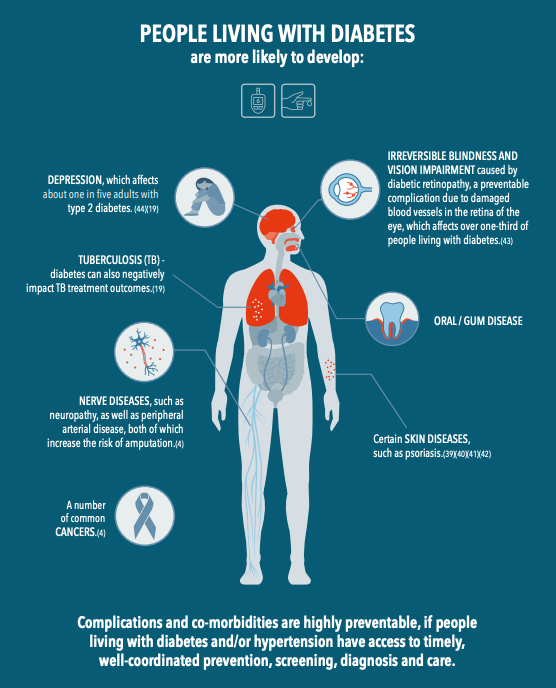

In [2]:
from IPython.display import display ,Image
img1=Image("Diabetes_graph.png")
display(img1)

In [3]:
# imports:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from pywaffle import Waffle

In [4]:
data=pd.read_csv("diabetes - diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Anlysis the data & Understand it :

In [5]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
-------------------------
shape of the dataset -->> (768, 9)


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Extract all Types of columns ffom the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include=("int64")).columns
    conts_cols=data.select_dtypes(include=("float64")).columns
    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index([], dtype='object')
 Numerical_columns ----->>> Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 
 Discrete_columns ---->>> Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Age', 'Outcome'],
      dtype='object') 
 Continous_cols ----->> Index(['BMI', 'DiabetesPedigreeFunction'], dtype='object') 
 Nominal Columns --->> Outcome    2
dtype: int64


In [8]:
#check if there null values in data:
data.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
for col in data.columns:
    print(data[col].value_counts())
    print("-"*25)

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
-------------------------
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
-------------------------
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
-------------------------
SkinThickness
0     227
32     31
30     27
27 

## Visualization the Data :

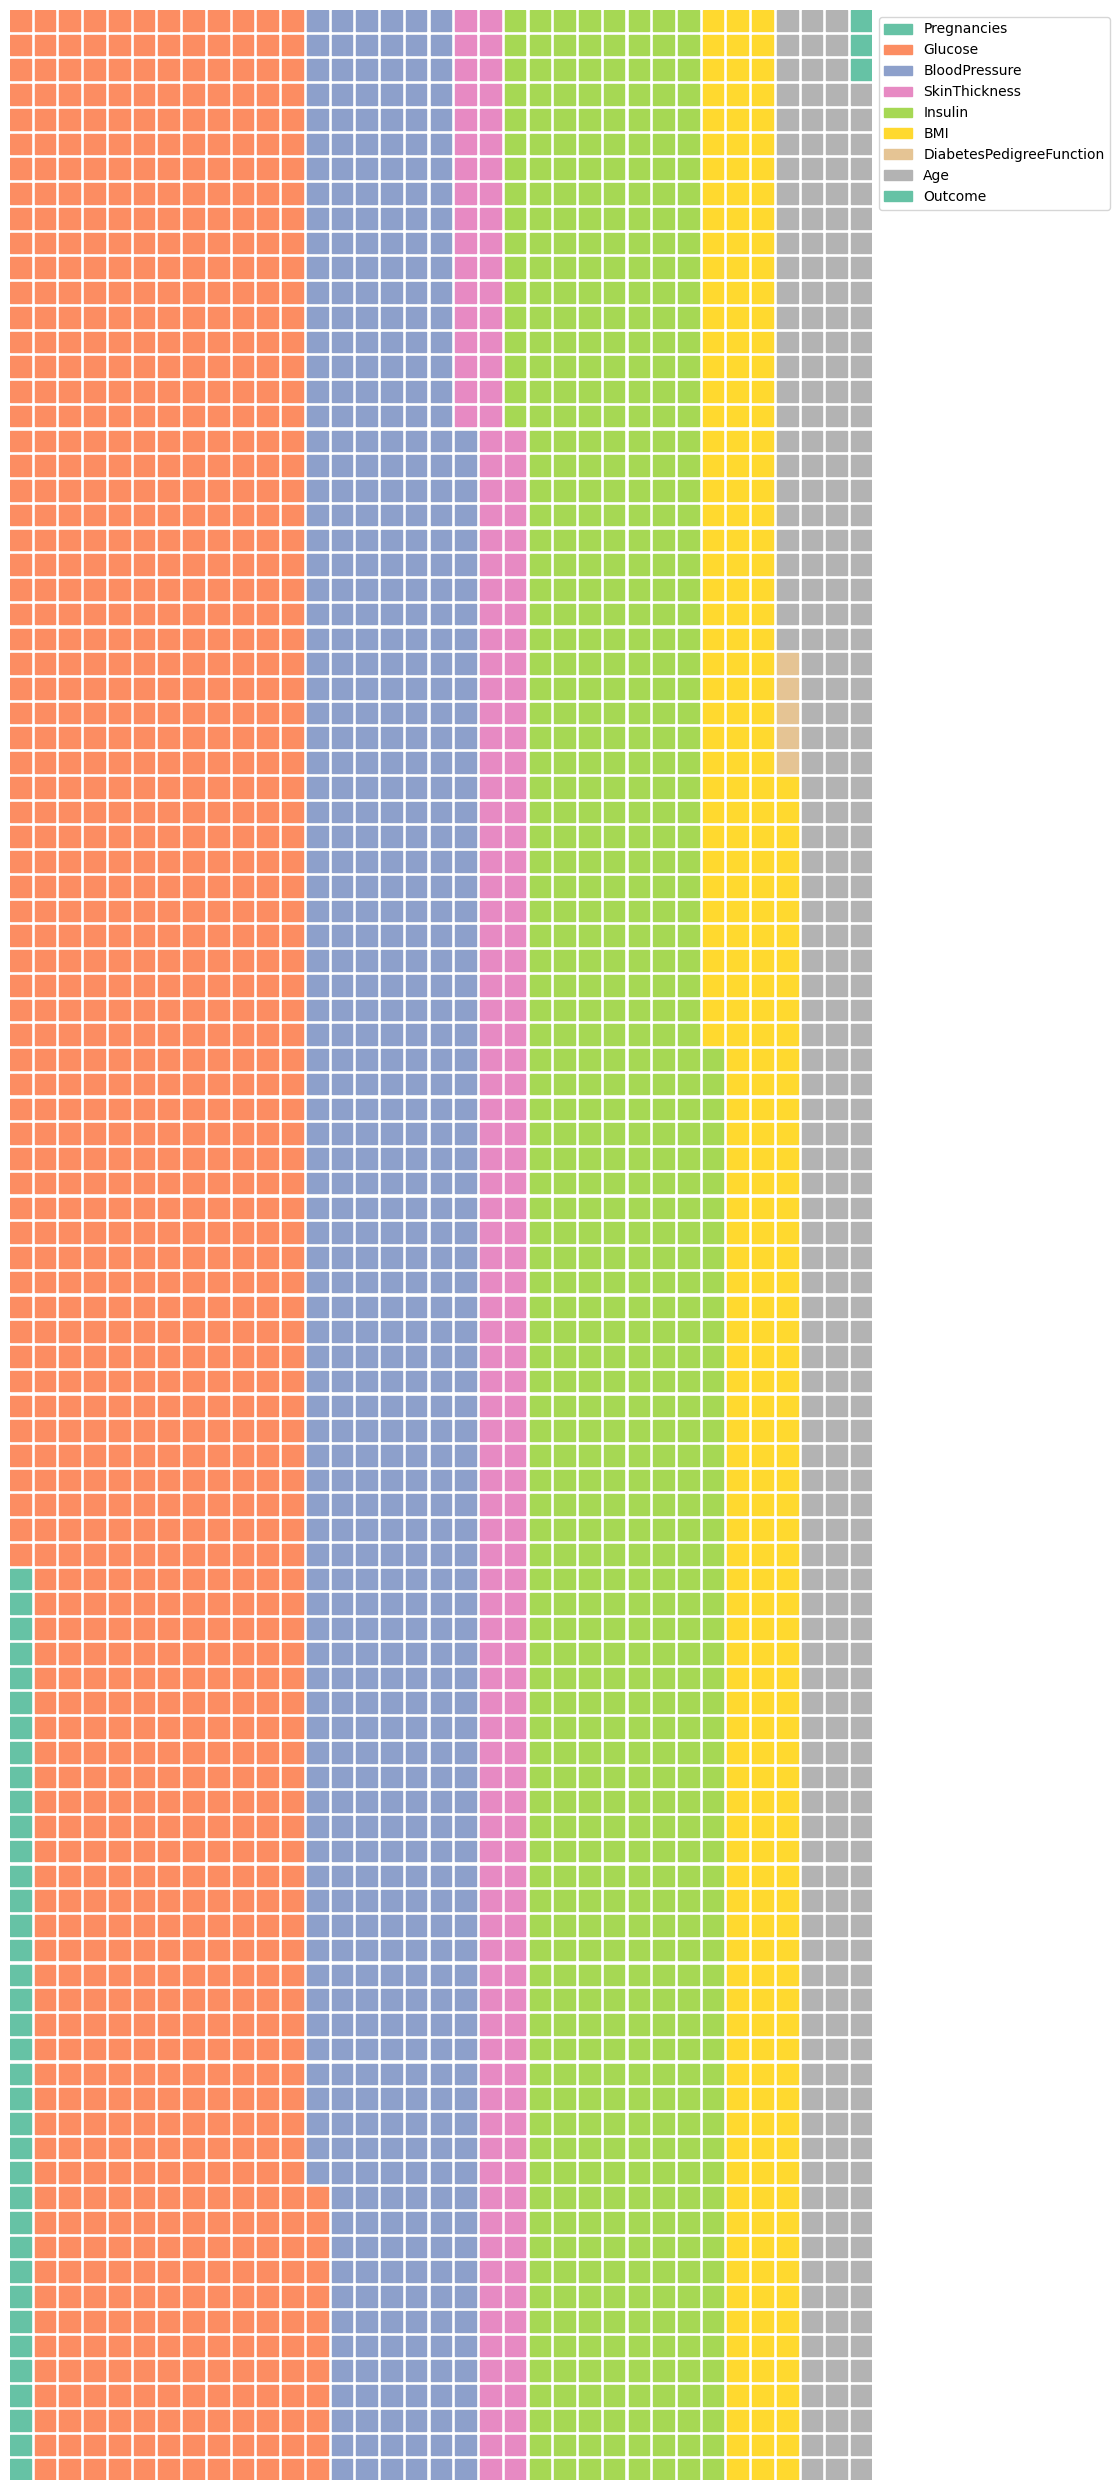

In [11]:
# to see which feature is Mange on all other features : 

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.show()

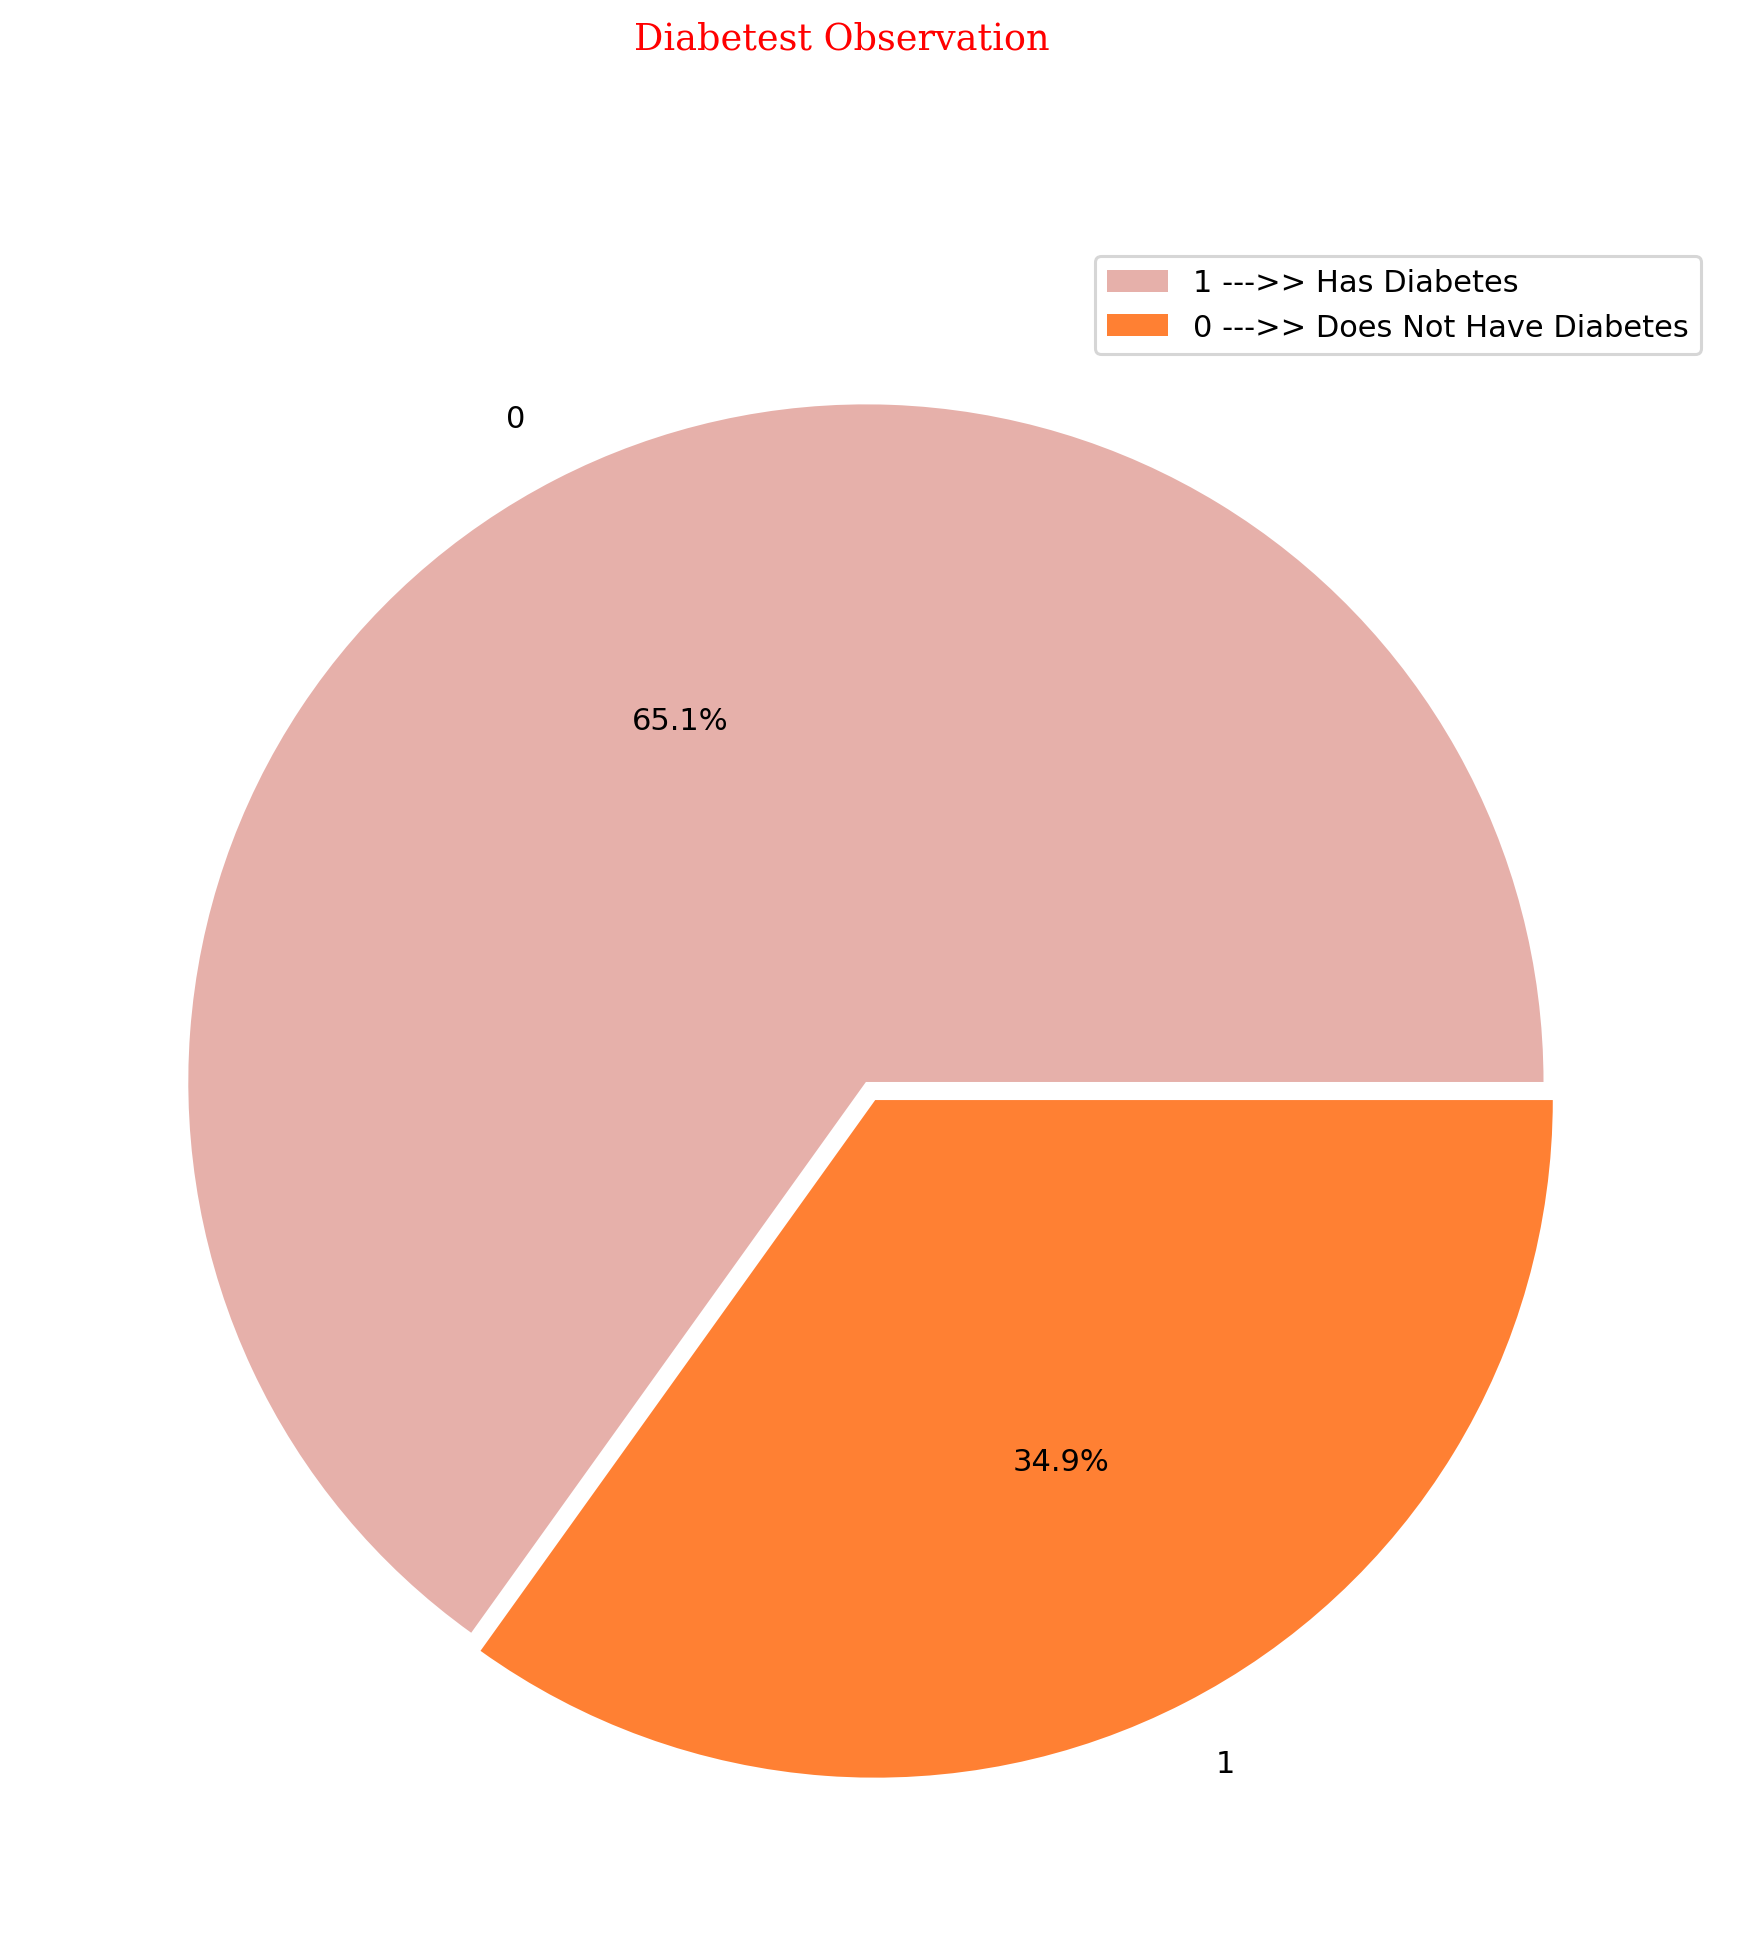

In [12]:
# Font style for titles
f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI

plt.figure(figsize=(10, 10), dpi=220)
plt.suptitle("Diabetest Observation",fontdict=f1)

# Create the first subplot
diapetest= data["Outcome"].value_counts()

# Plot the pie chart for the top 10 milk types
plt.pie(
    x=diapetest,  
    labels=diapetest.index,  
    colors=["#E6B0AA","#FF8033"],
    explode=[0.01, 0.02],
    autopct='%1.1f%%',
    radius=1,
)
plt.legend(labels=['1 --->> Has Diabetes', '0 --->> Does Not Have Diabetes']) 




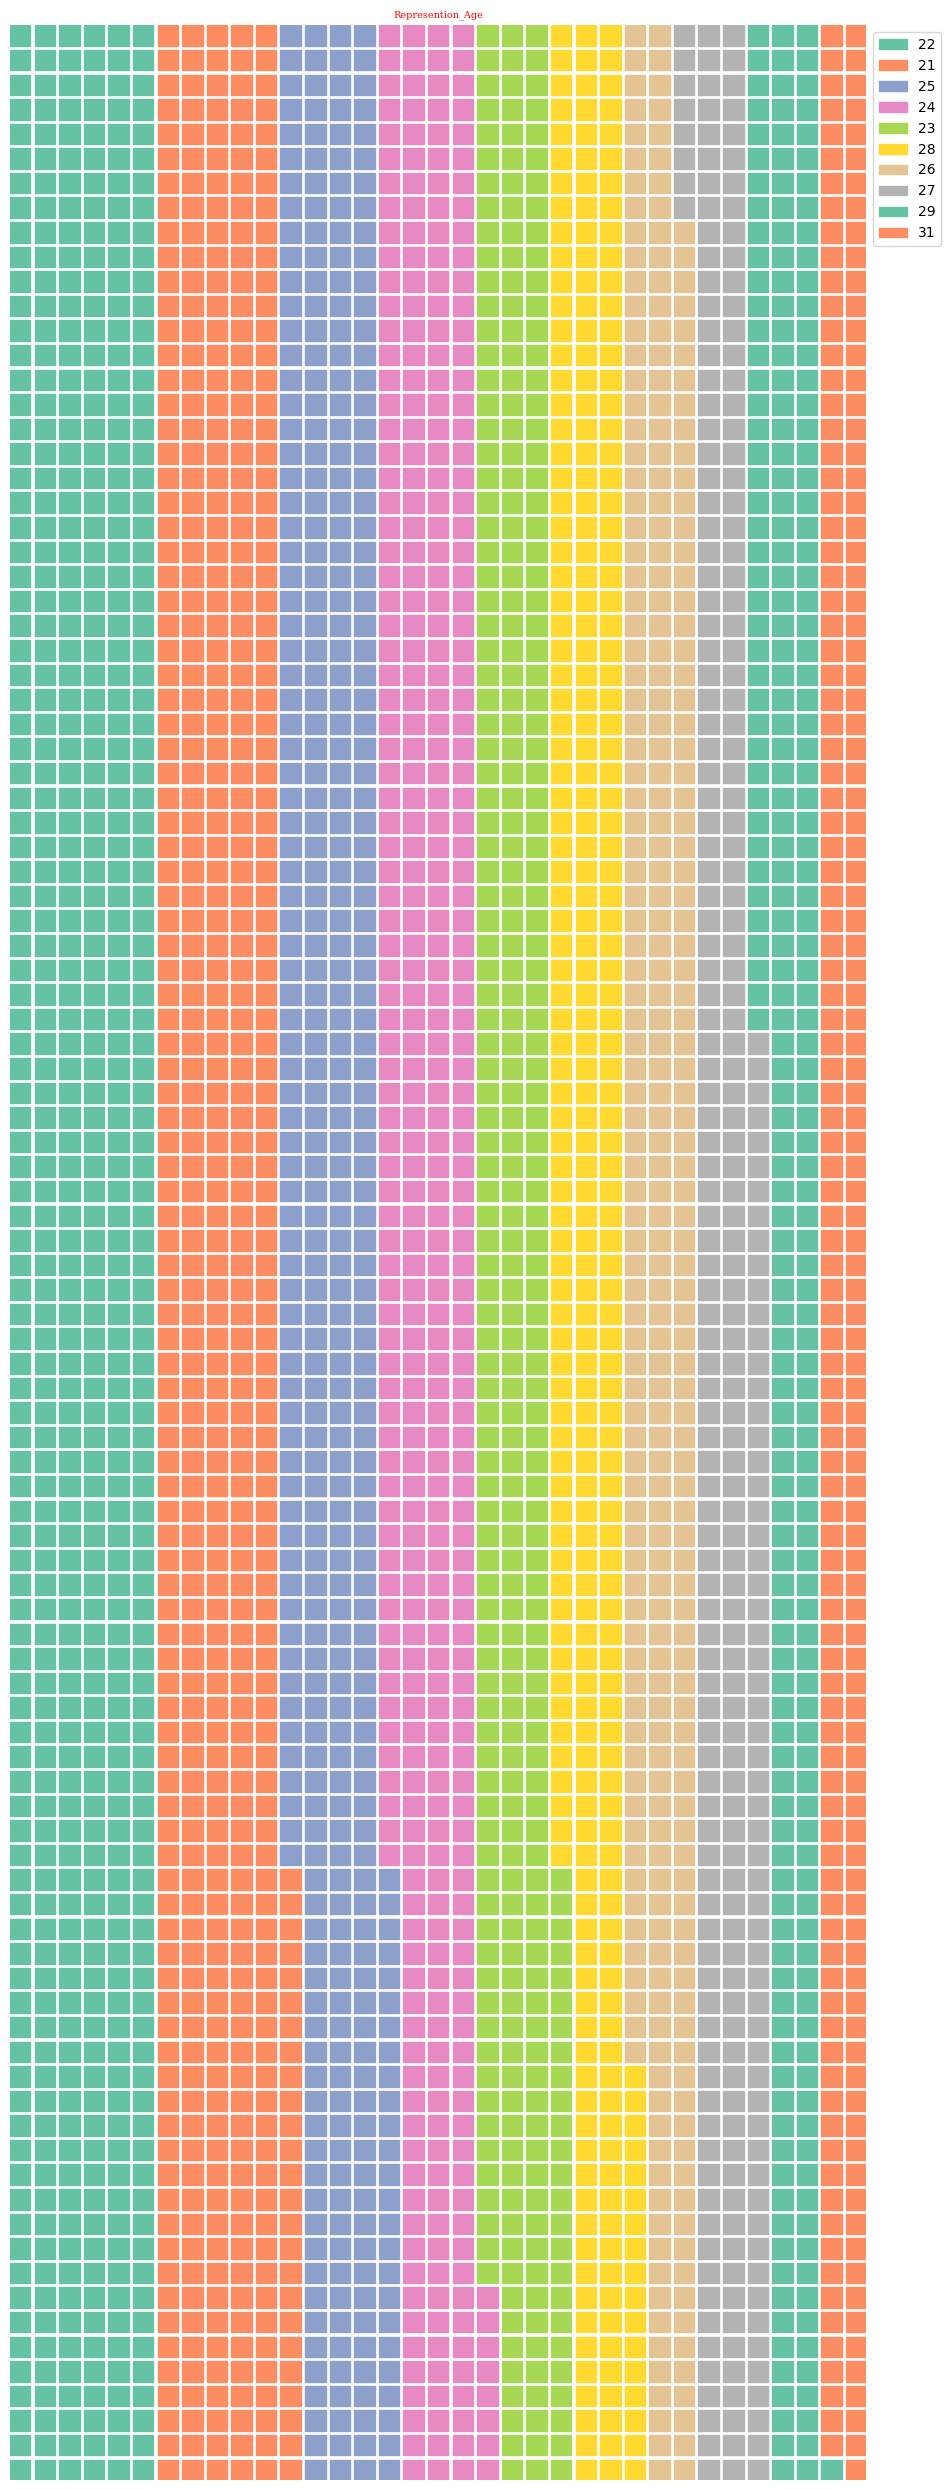

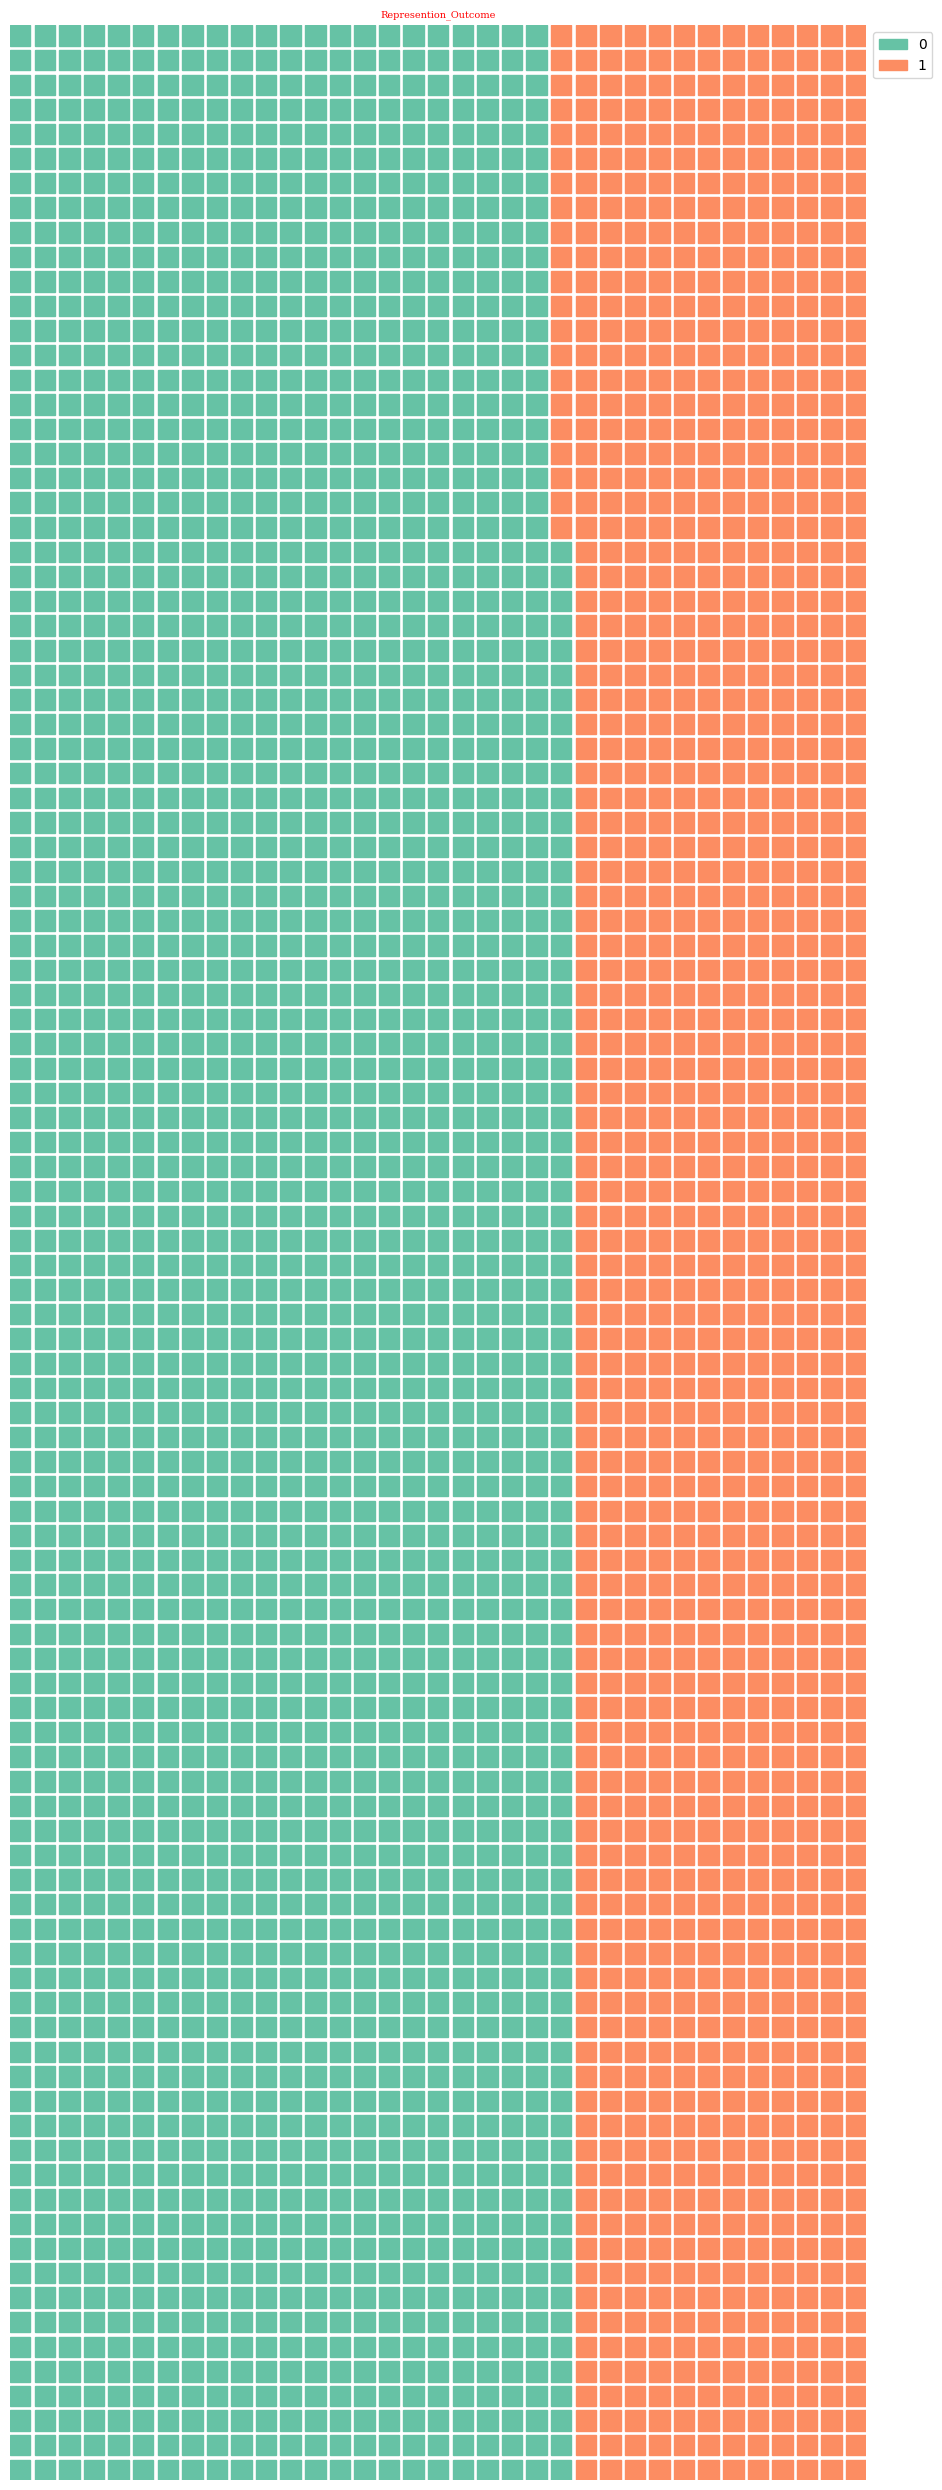

In [13]:
# to see which item in every feature mange on other features : 

from pywaffle import Waffle

Features=["Age","Outcome"]

for col in Features :
    f = data[col].value_counts()
    TOp_10_f= f.head(10)
    
    # Ensure that 'values' is a list of numerical values
    values = TOp_10_f.tolist()

    
    
    # Create the waffle chart
    fig = plt.figure(
       FigureClass=Waffle,
       rows=100,
       columns=35,
       values=values,
       legend={'labels': TOp_10_f.index.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
                )
    plt.title("Represention_" +col,fontdict=f1)

# Show the plot
plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


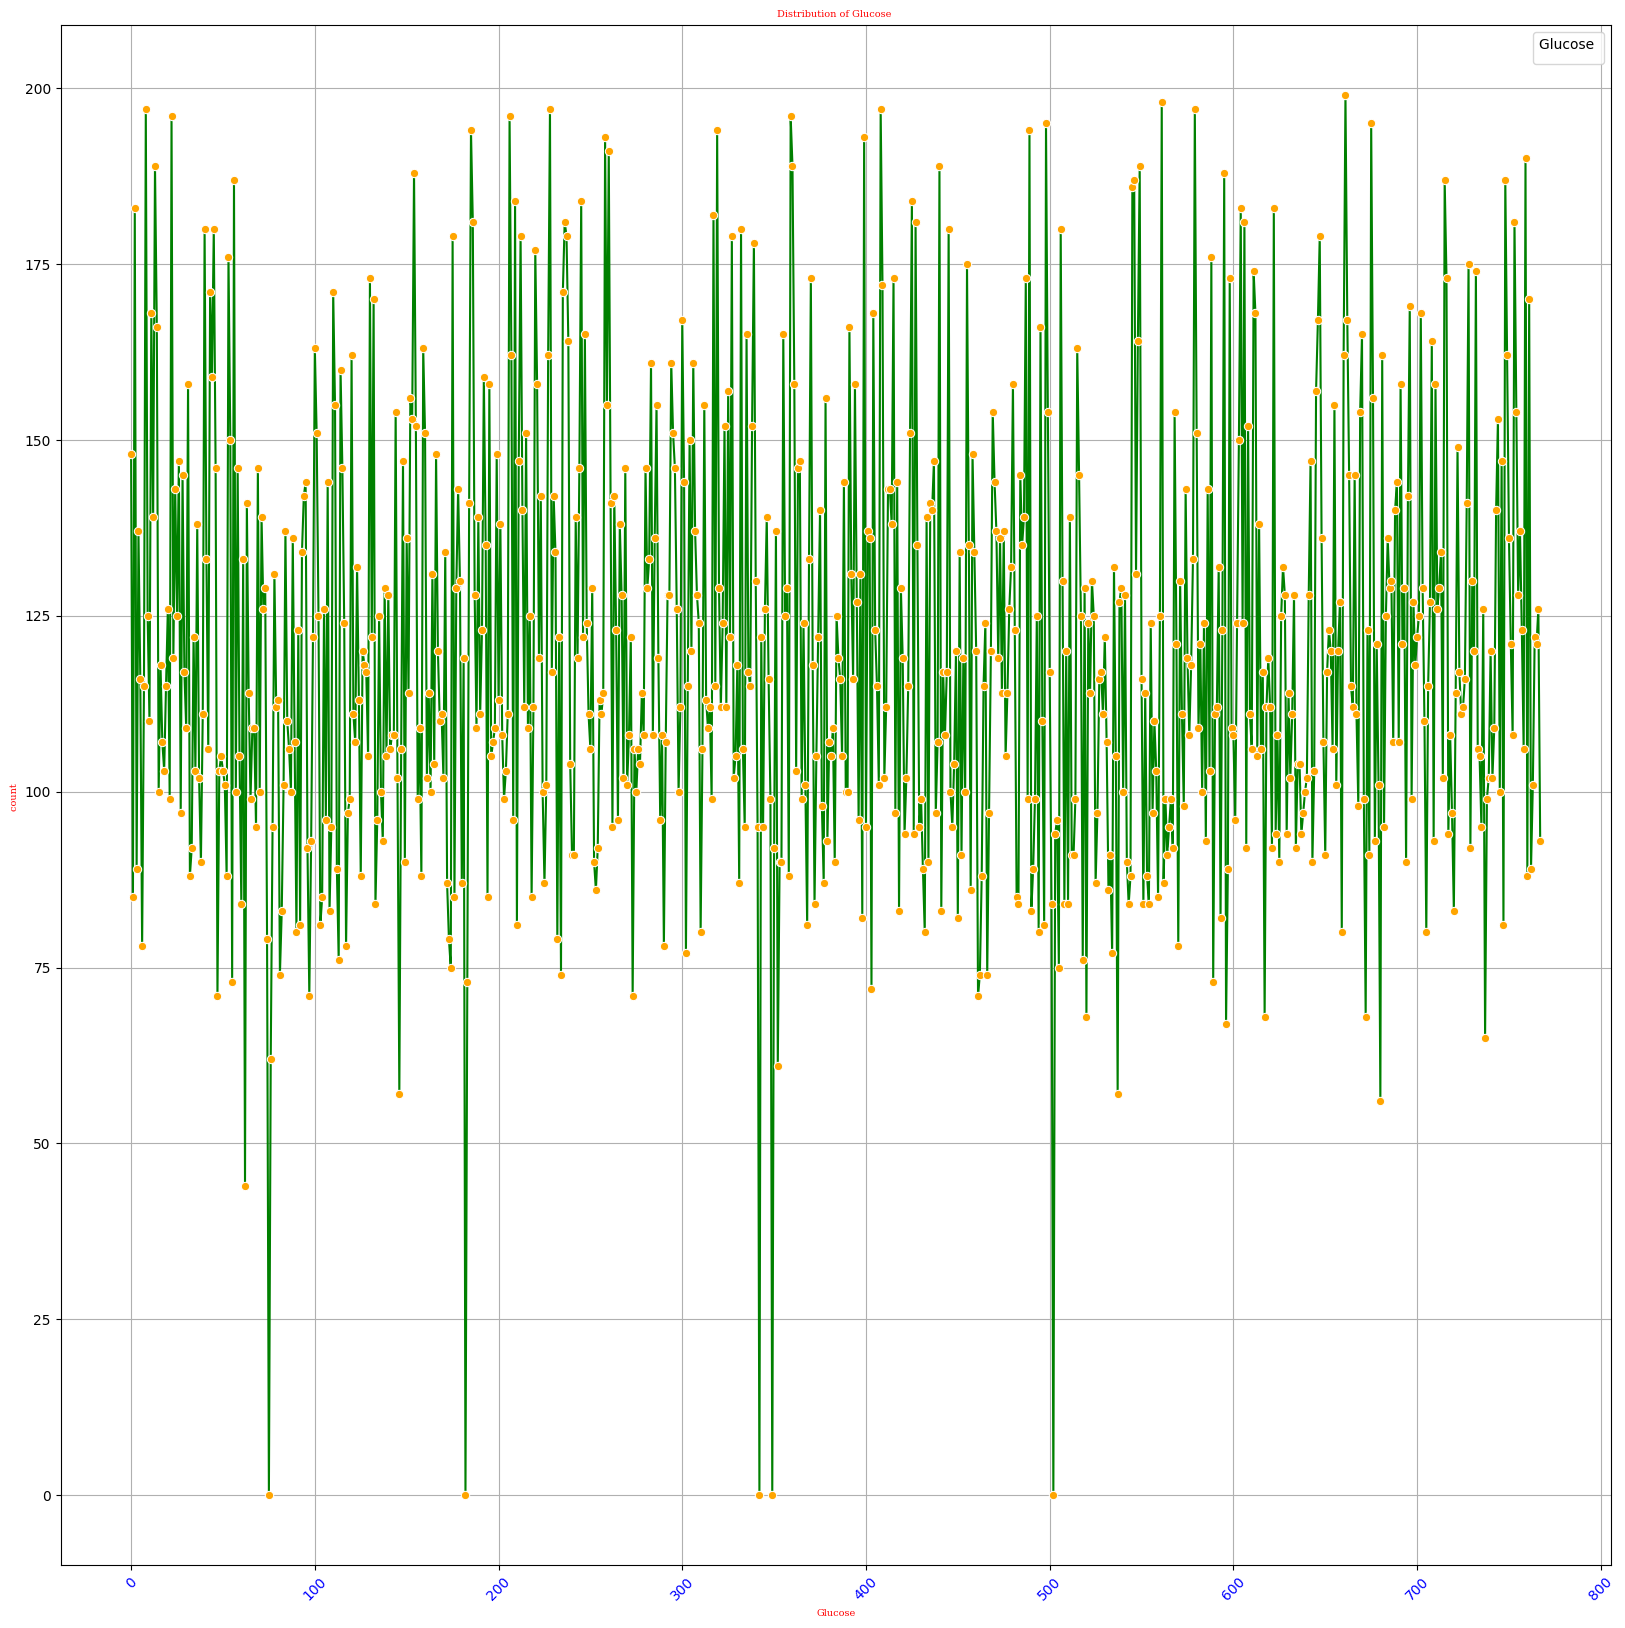

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


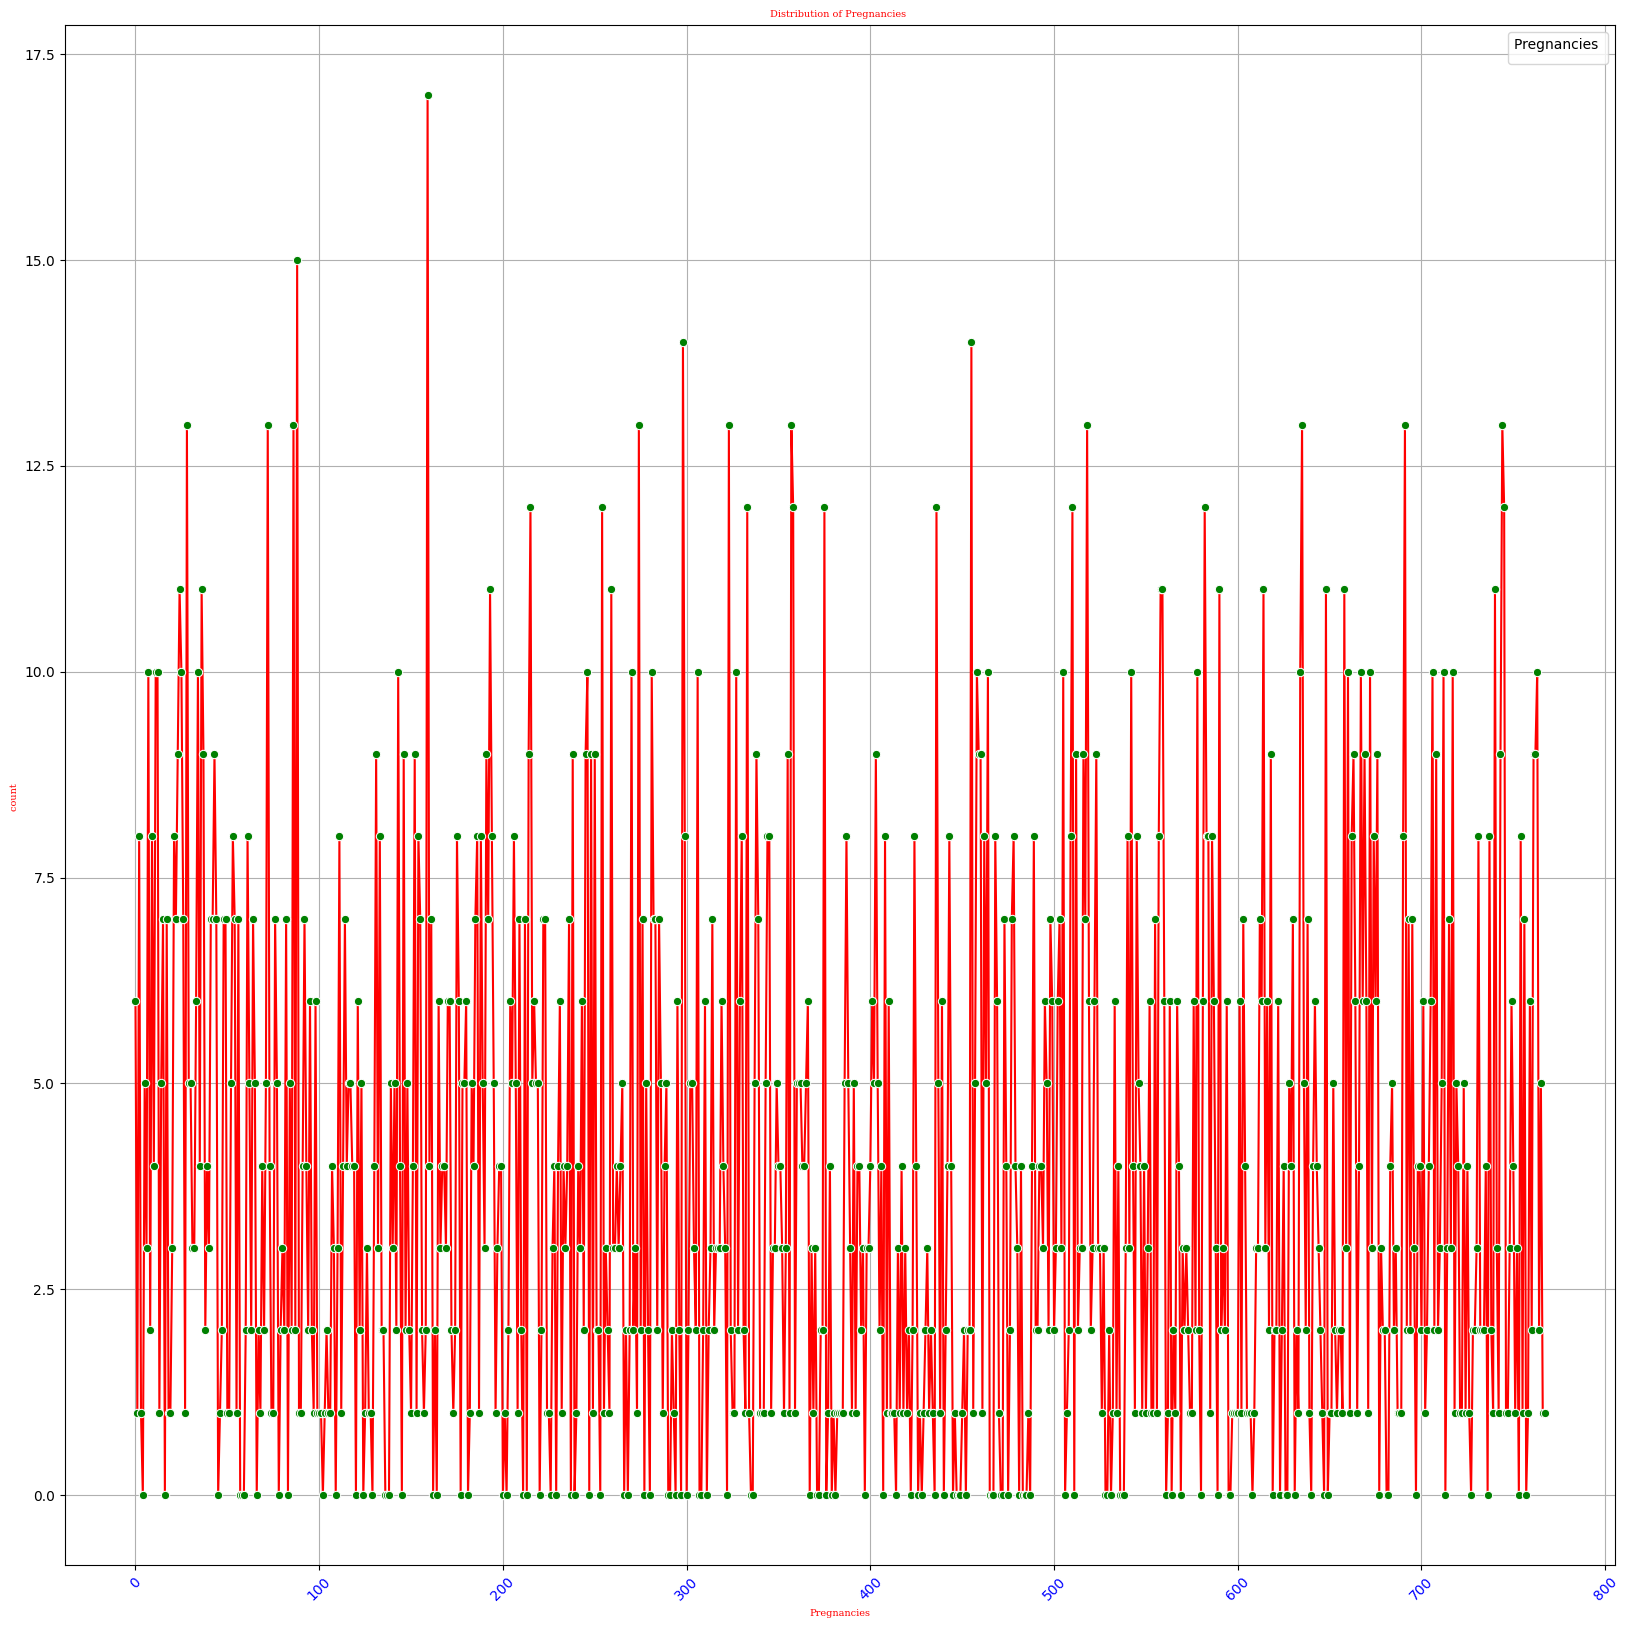

In [14]:
# Glucose Represention :

plt.figure(figsize=(20,20))
plt.title("Distribution of Glucose ",fontdict=f1)
top=data["Glucose"].sort_values(ascending=False)
sns.lineplot(x=top.index,y=top.values,color="g",marker="o",mfc="orange")
plt.xticks(rotation=45,color="b")
plt.xlabel("Glucose",fontdict=f1)
plt.ylabel("count ",fontdict=f1)
plt.legend(title="Glucose ")
plt.grid(True)
plt.show()

# Pregnancies Represention : 

plt.figure(figsize=(20,20))
plt.title("Distribution of Pregnancies ",fontdict=f1)
top=data["Pregnancies"].sort_values(ascending=False)
sns.lineplot(x=top.index,y=top.values,color="r",marker="o",mfc="g")
plt.xticks(rotation=45,color="b")
plt.xlabel("Pregnancies",fontdict=f1)
plt.ylabel("count ",fontdict=f1)
plt.legend(title="Pregnancies ")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


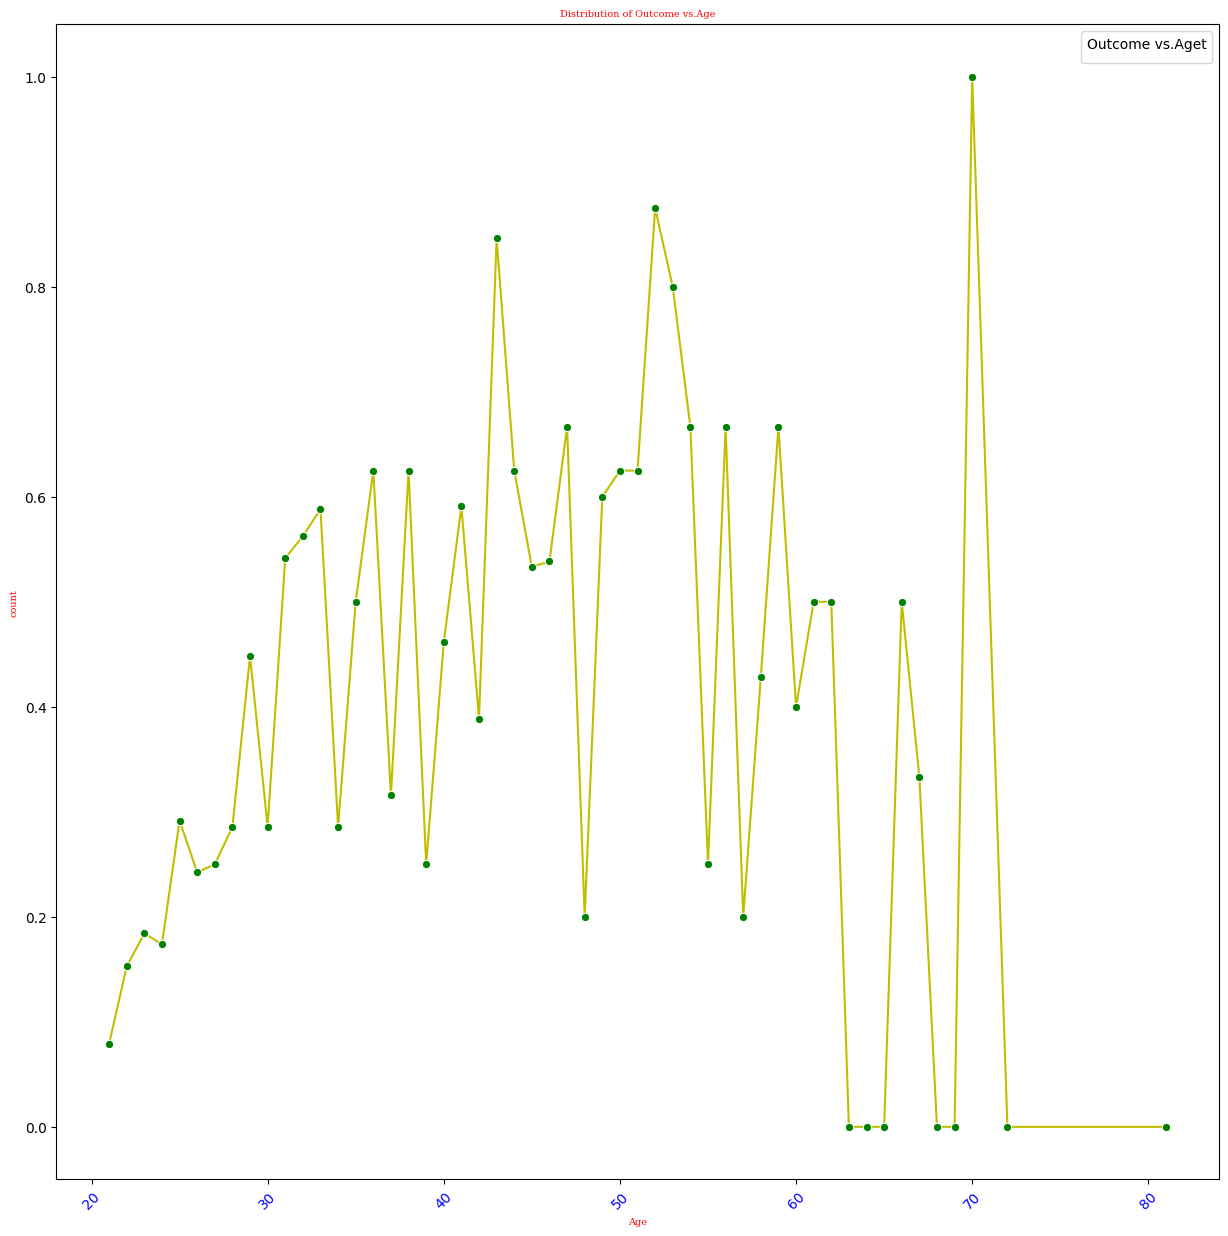

In [15]:
# oserve the Outcome vs.Age :

plt.figure(figsize=(15,15))
plt.title("Distribution of Outcome vs.Age",fontdict=f1)
top=data.groupby("Age")["Outcome"].mean().sort_values(ascending=False)
sns.lineplot(x=top.index,y=top.values,color="y",marker="o",mfc="g")
plt.xticks(rotation=45,color="b")
plt.xlabel("Age",fontdict=f1)
plt.ylabel("count",fontdict=f1)
plt.legend(title="Outcome vs.Aget")
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

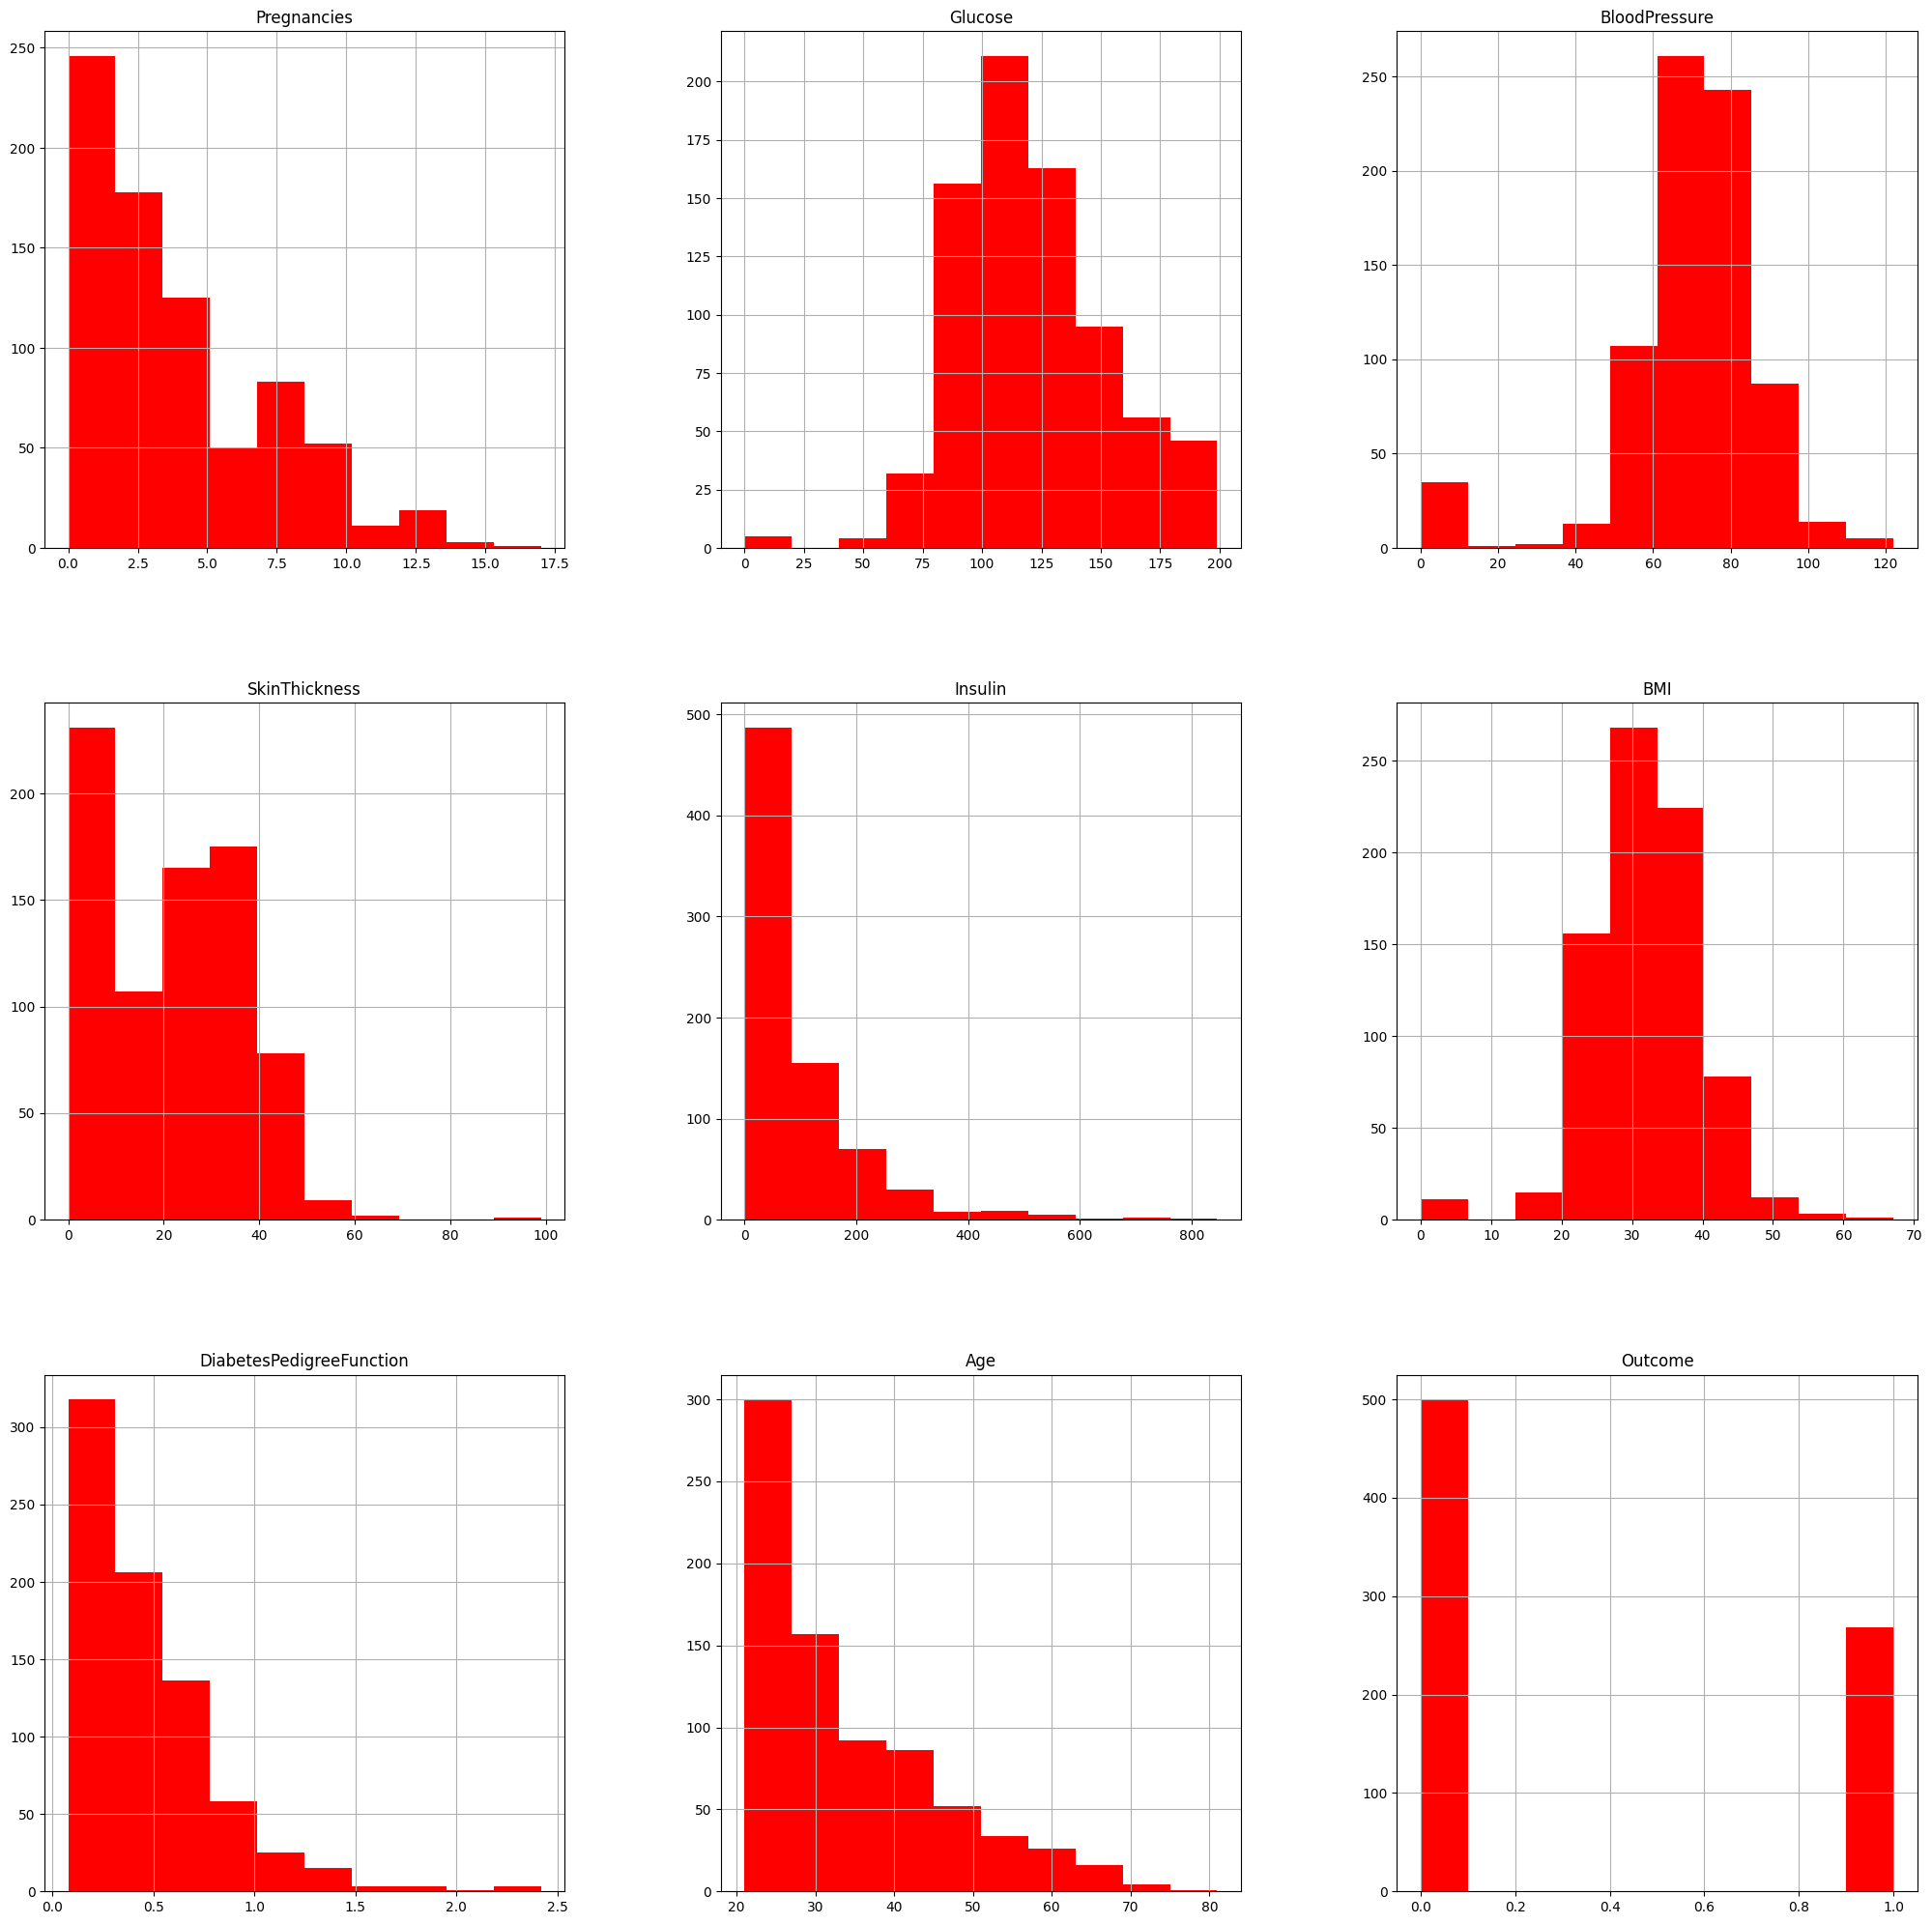

In [16]:
# histogram of data:
data.hist(figsize=(25,25),color="r")

<Figure size 30000x30000 with 0 Axes>

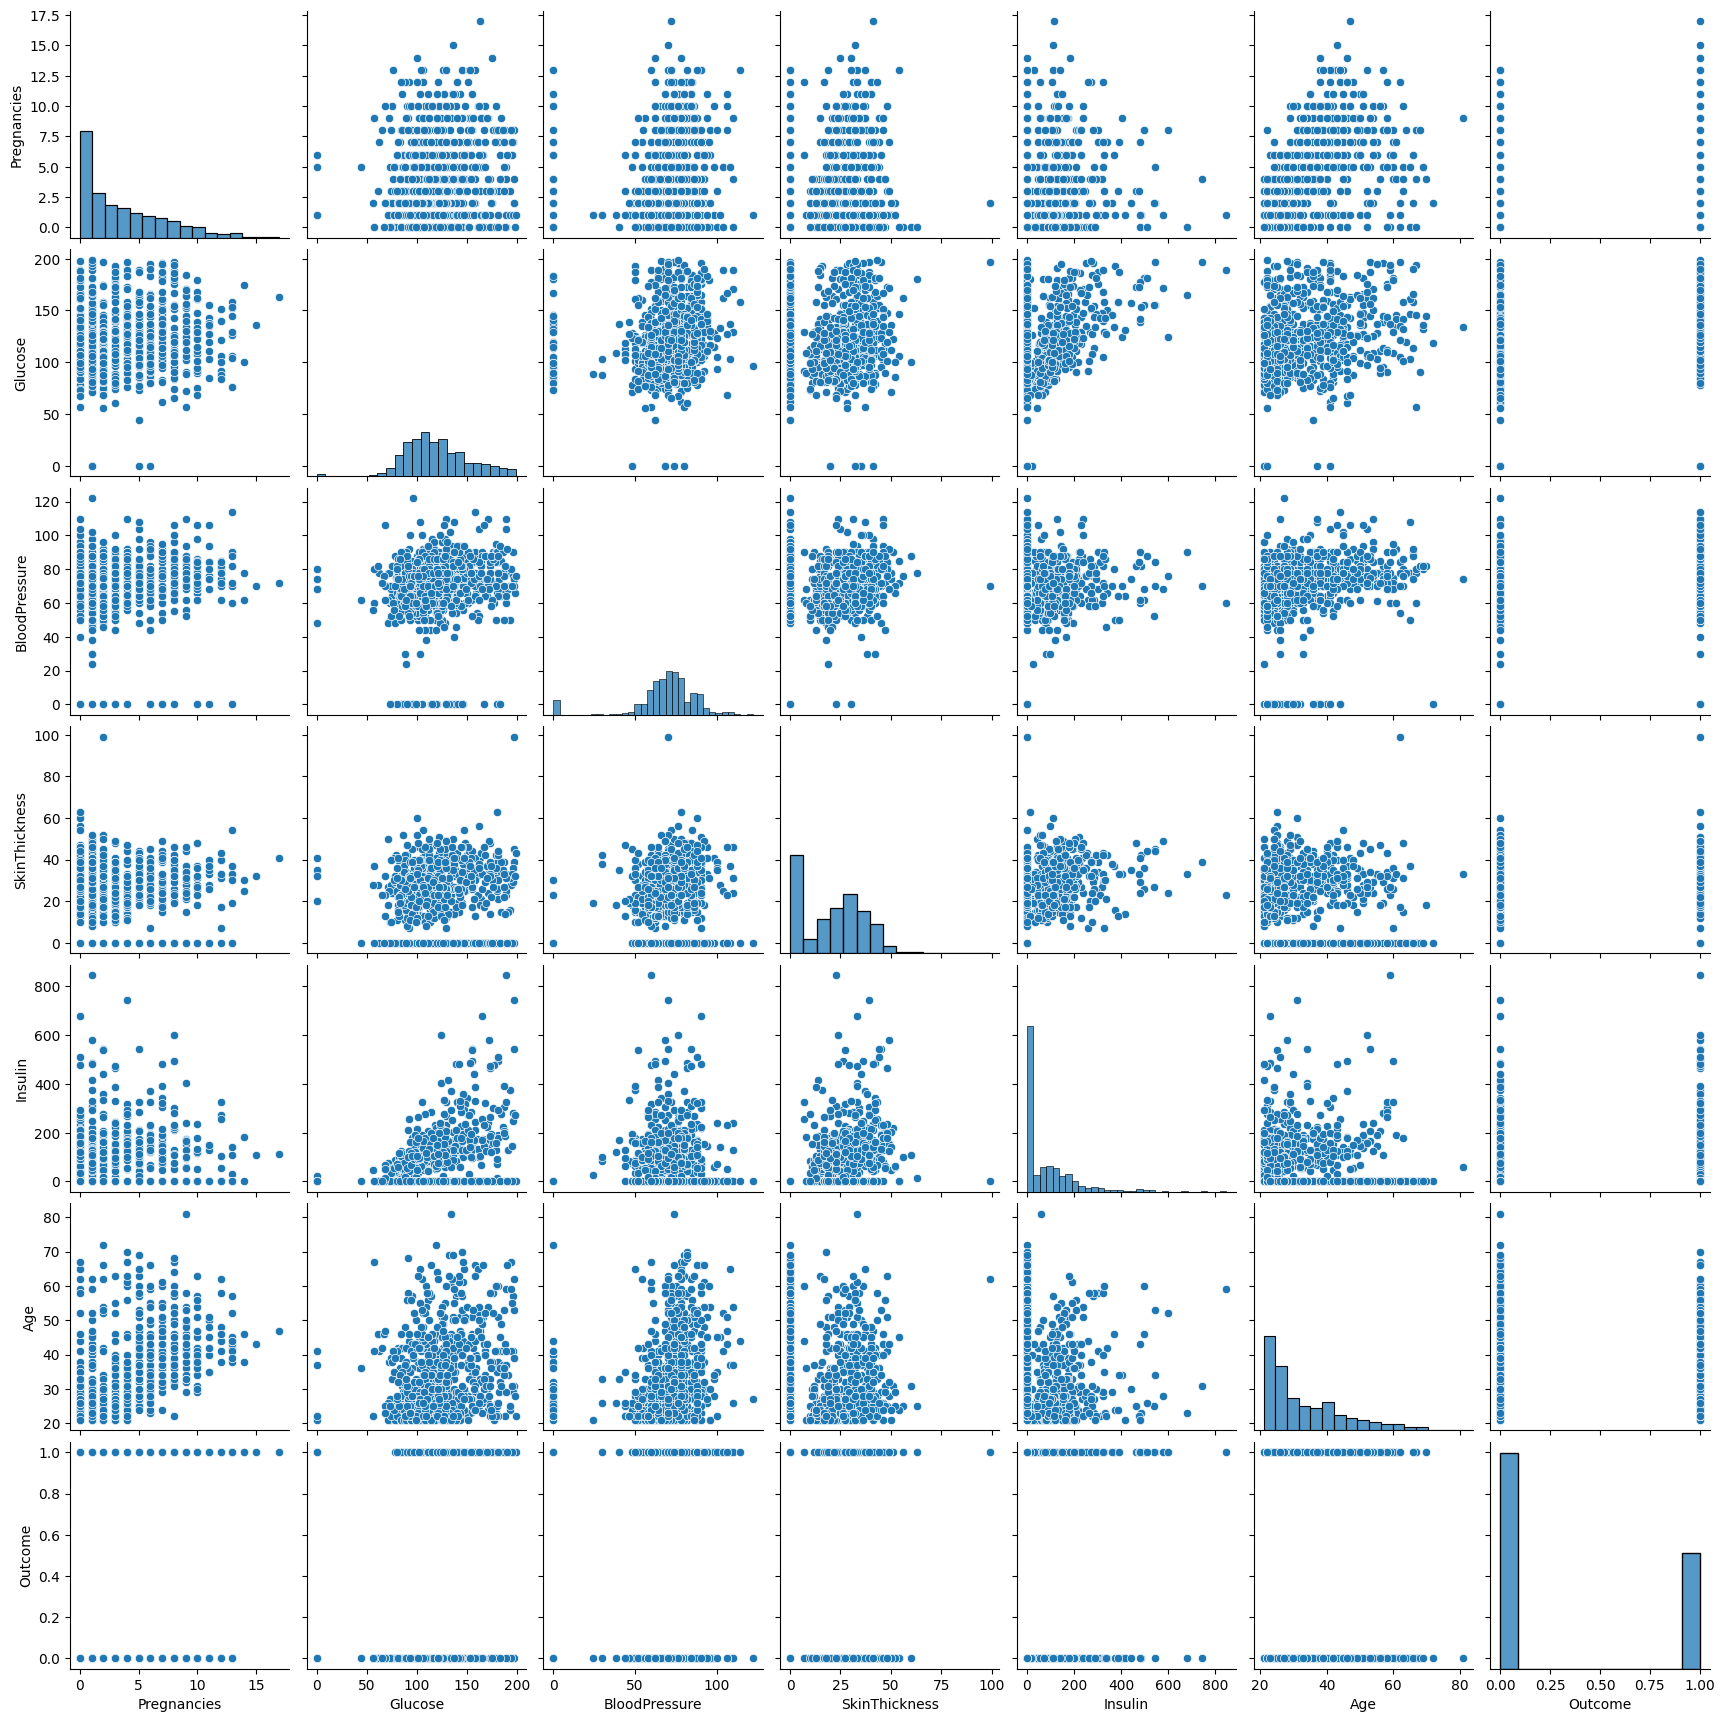

In [17]:
# scatterplots & barplot to cover on the discrete_features: 

plt.figure(figsize=(100,100),dpi=300)
sns.pairplot(data.select_dtypes(include="int64"))

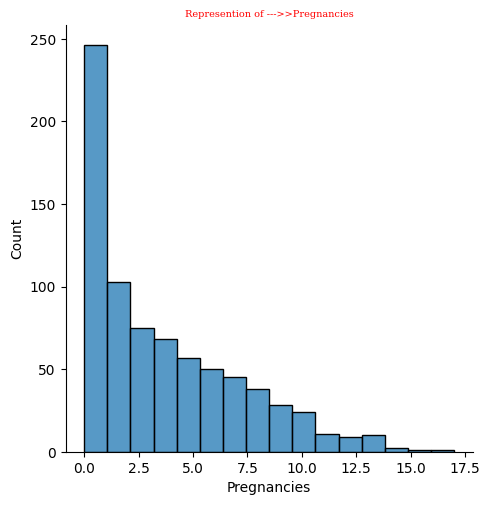

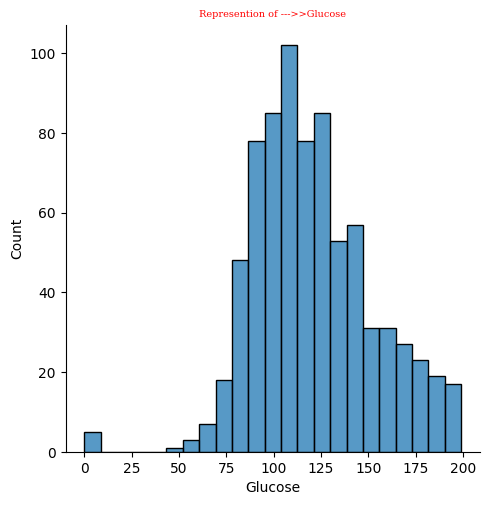

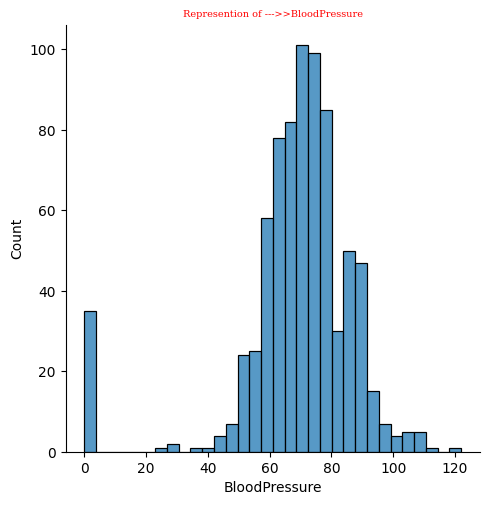

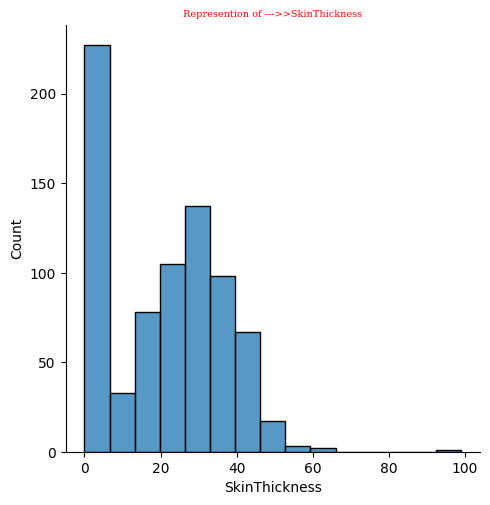

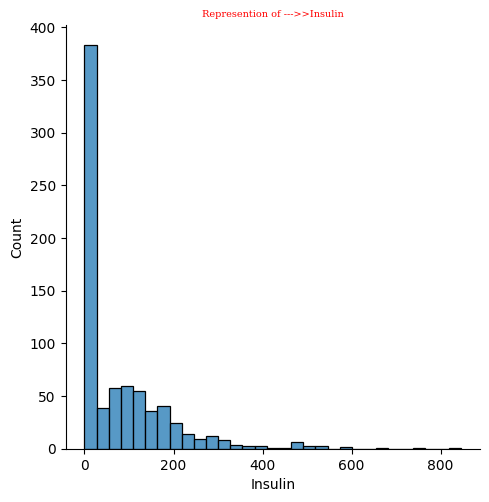

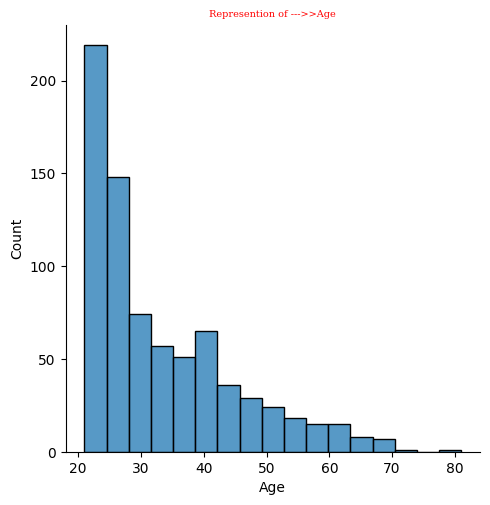

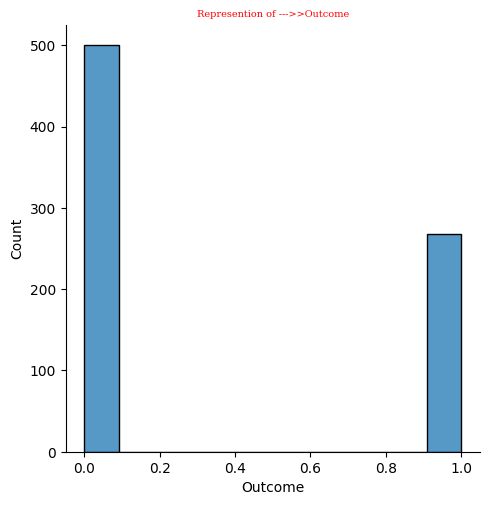

In [18]:
# Represention of the ALL Features:
for col in data.select_dtypes(include="int64").columns:
    sns.displot(data[col])
    plt.title("Represention of --->>"+col,fontdict=f1)

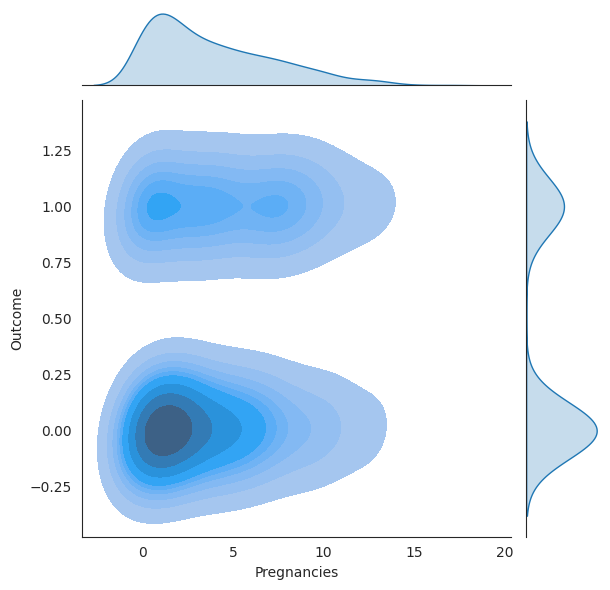

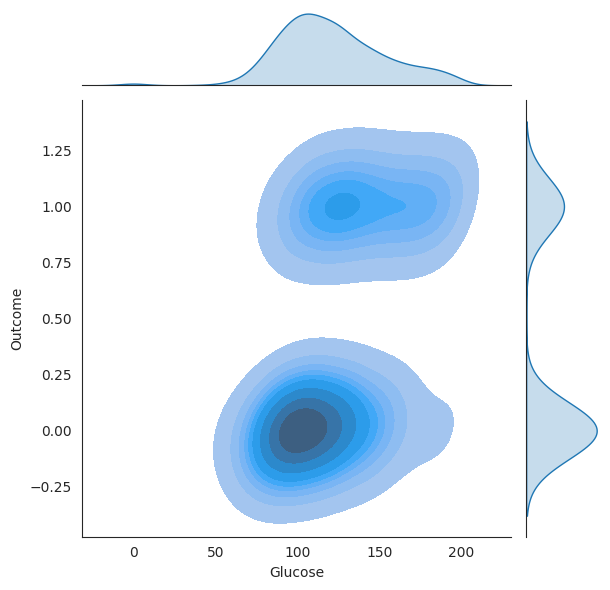

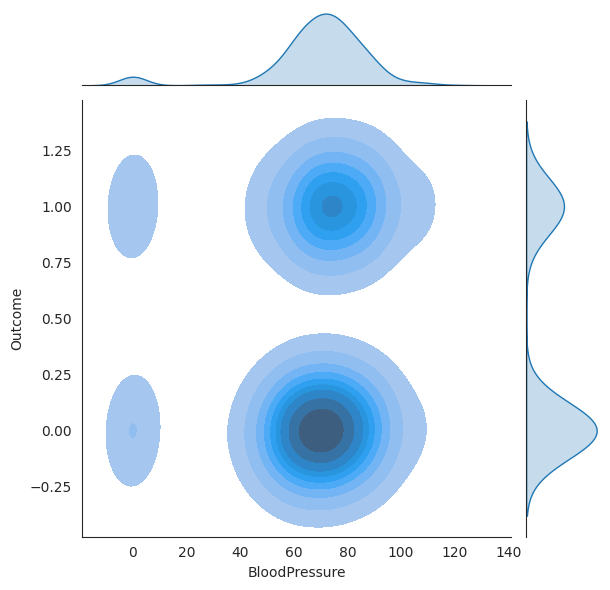

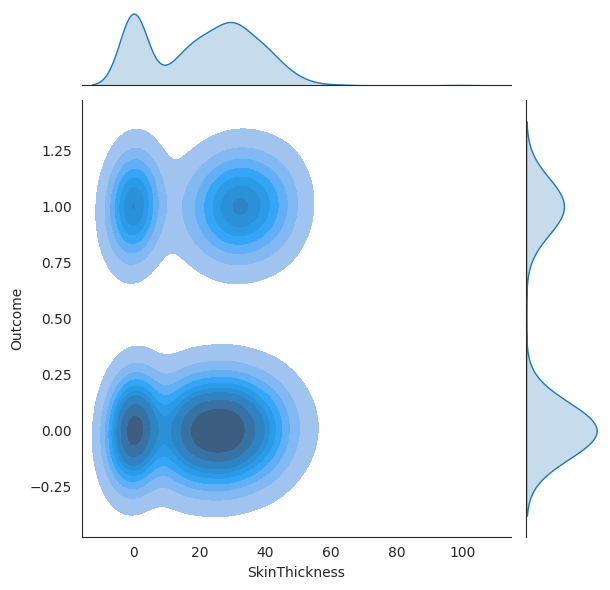

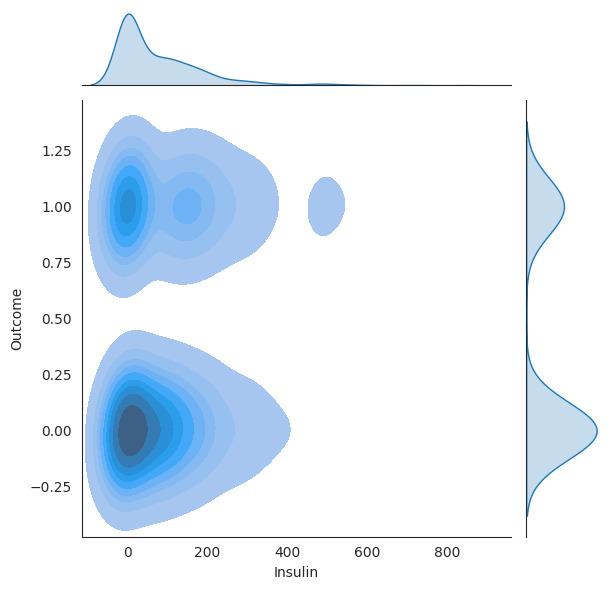

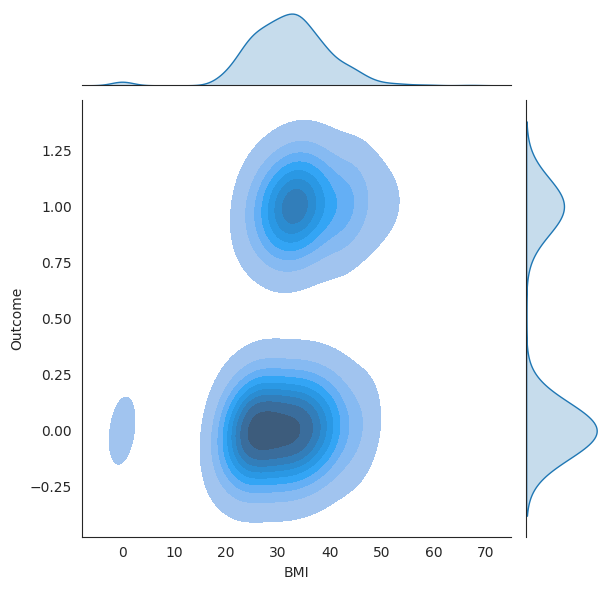

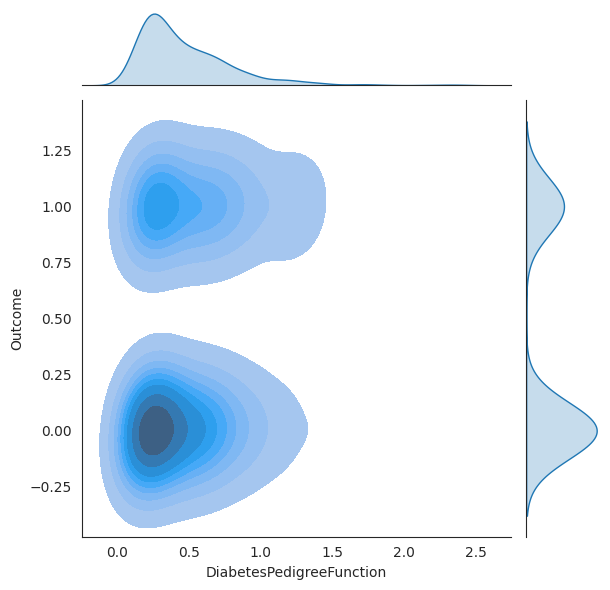

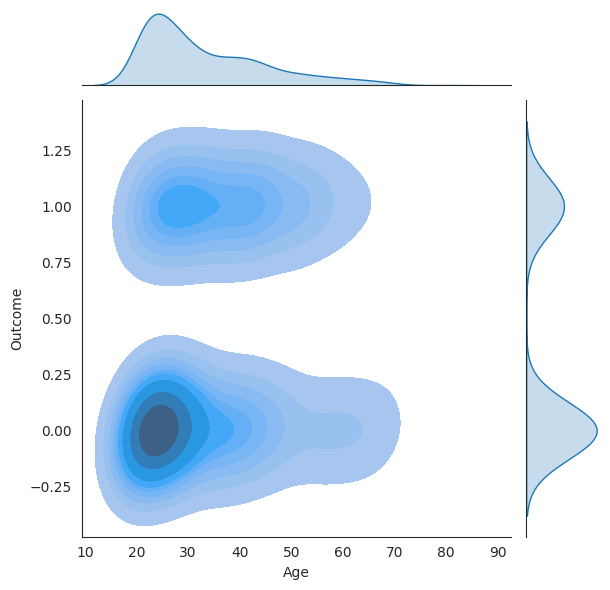

In [19]:
# observe the contor of Anaemic with the other features 
for col in data.select_dtypes("number"):
    if col !="Outcome":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["Outcome"],kind="kde",fill=True)

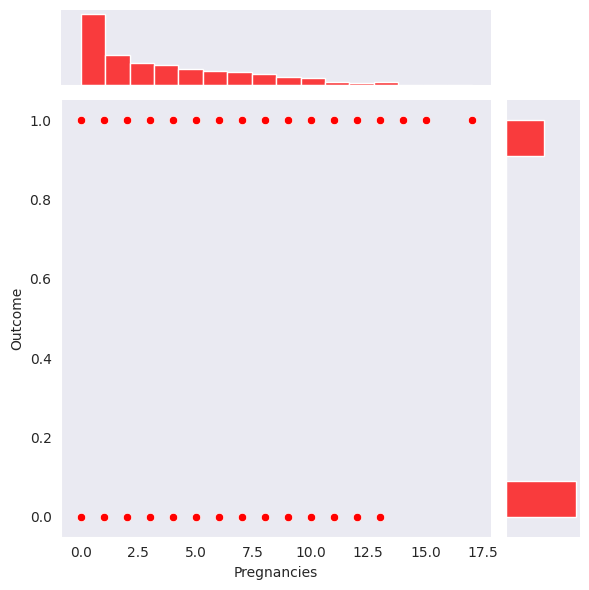

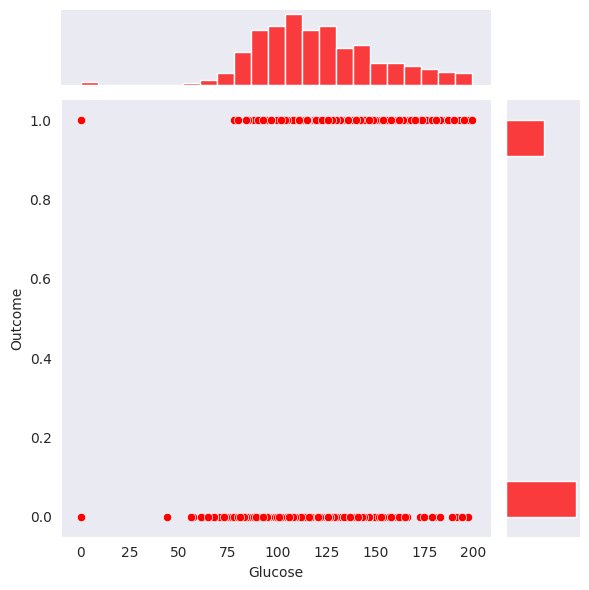

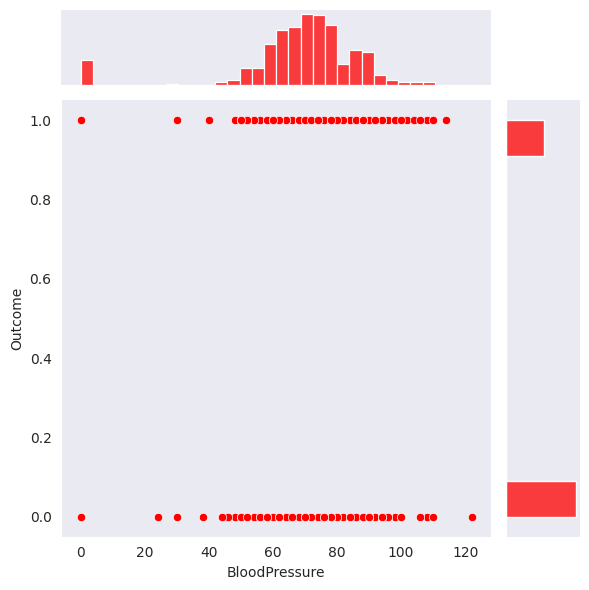

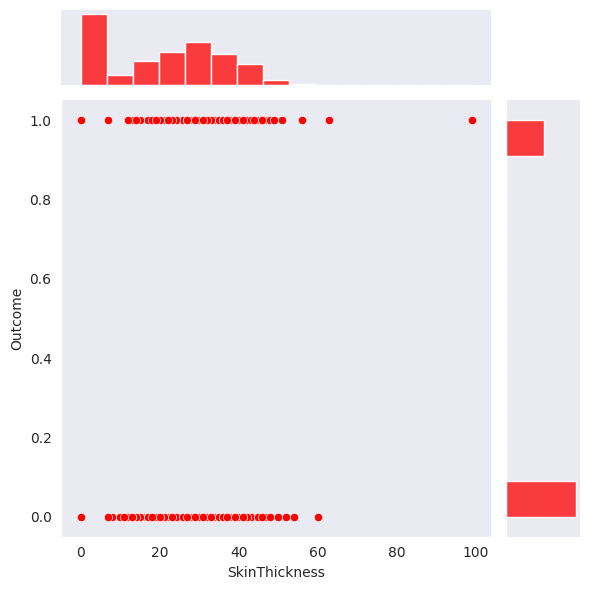

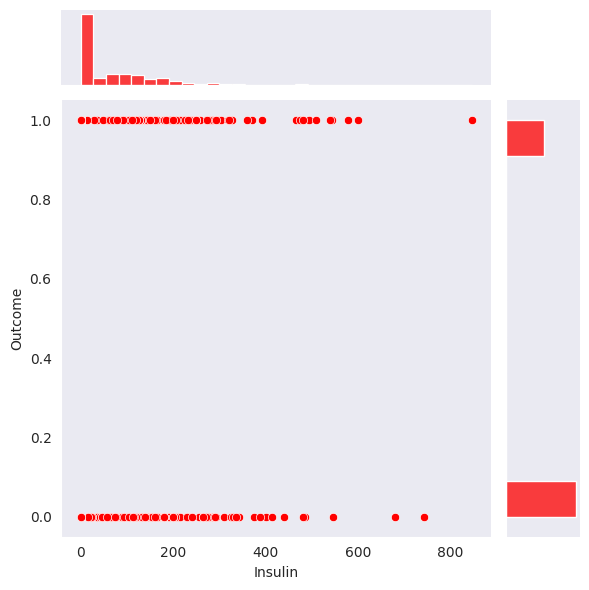

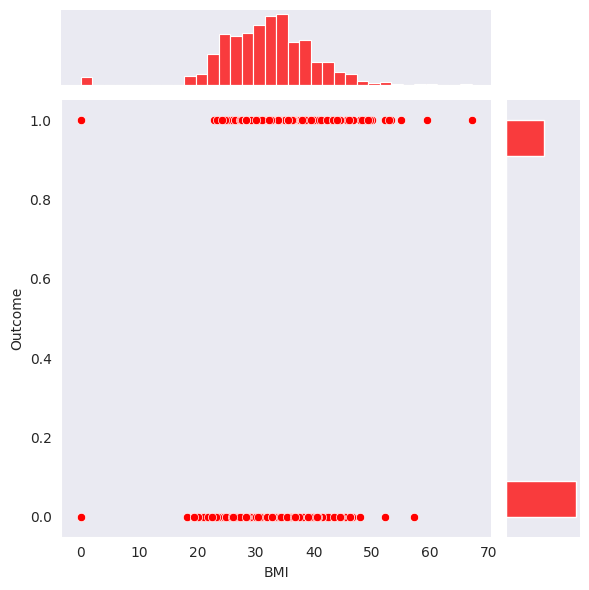

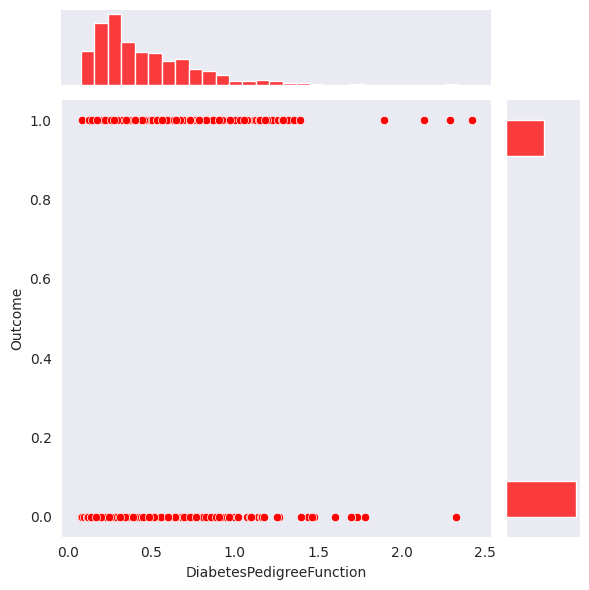

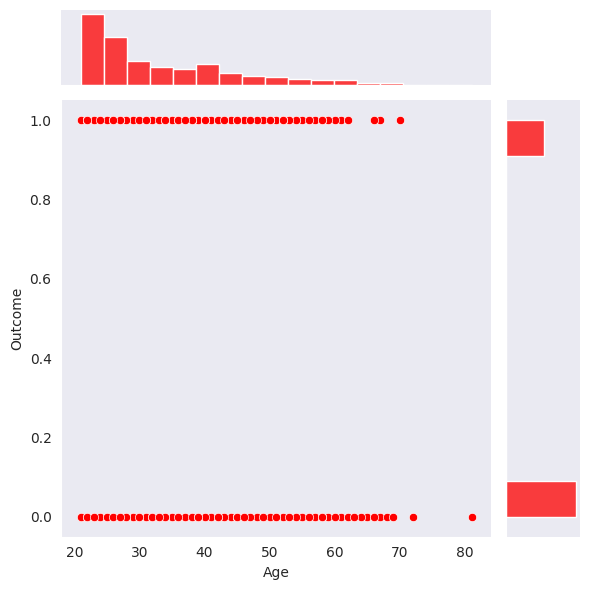

In [20]:
# observe the contor of Anaemic with the other features 
for col in data.select_dtypes("number"):
    if col !="Outcome":
       with sns.axes_style("dark"):
          sns.jointplot(x=data[col],y=data["Outcome"],kind="scatter",color="r")

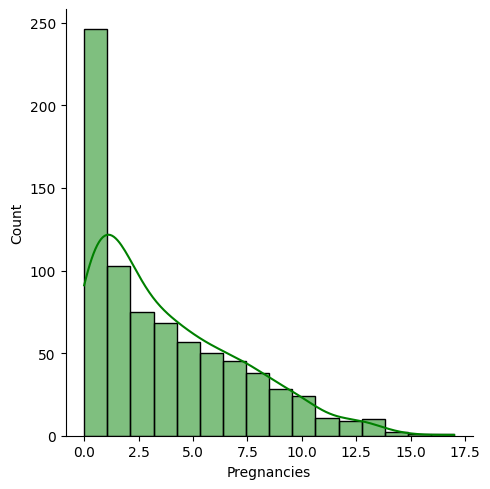

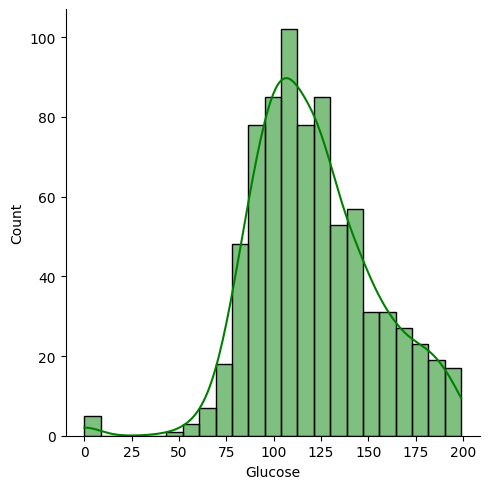

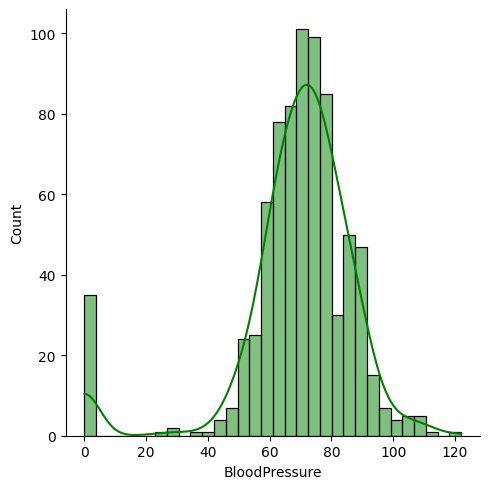

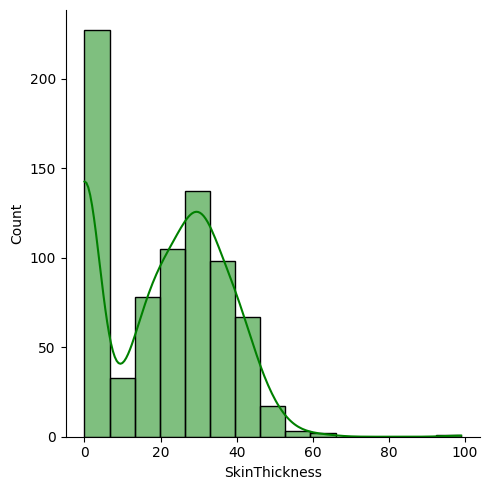

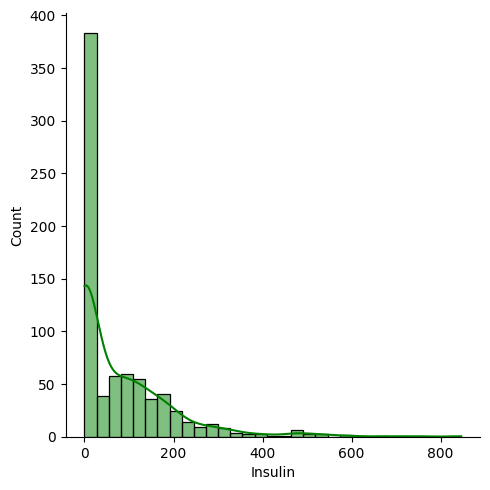

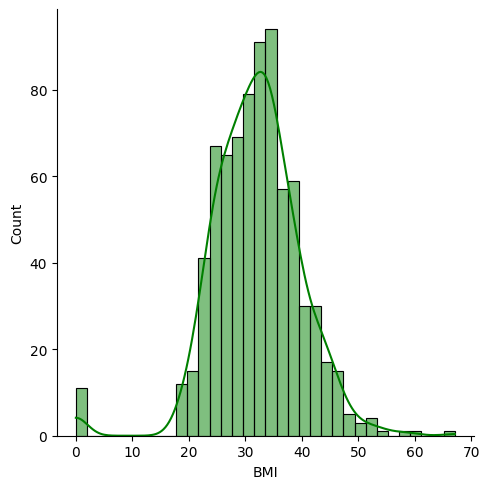

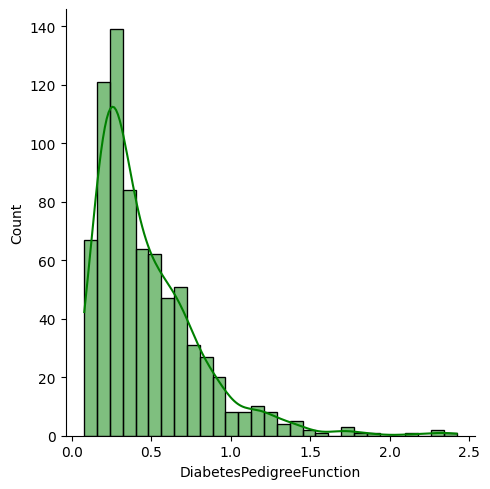

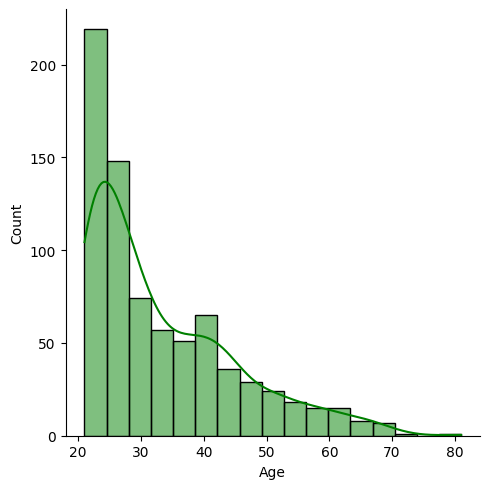

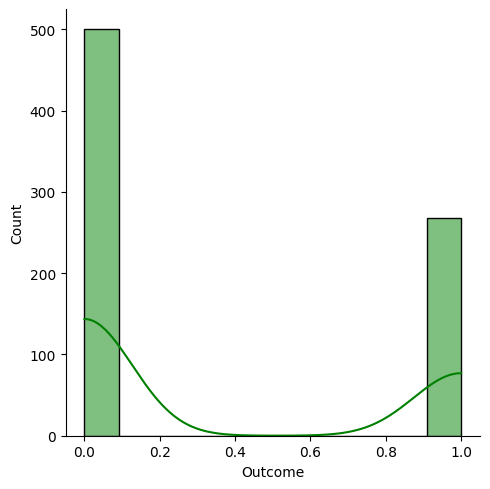

In [21]:
# distplots with kde:
for col in data.columns:
    sns.displot(data[col],kde=True,color="g")

## Data processing :

In [22]:
# Convert all Categorical columns into Numerical columns :
# All data Become Numerical : 

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


## Check Outliers :

In [23]:
# found many feature contain the outliers  :
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

Ther outlier in this feature Pregnancies
Q1 of Pregnancies --->>> 1.0 
 Q3 of Pregnancies ---->>> 6.0 
 iqr--->>5.0
 low_limit--->>>-6.5 
  upper_limit--->>> 13.5 
 outlier---->>> [15, 16, 14, 14] 
 Number of outliers --->>> 4
-------------------------
 * -- >> there No outlier in Glucose feature
Q1 of Glucose --->>> 37.0 
 Q3 of Glucose ---->>> 78.25 
 iqr--->>41.25
 low_limit--->>>-24.875 
  upper_limit--->>> 140.125 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
Ther outlier in this feature BloodPressure
Q1 of BloodPressure --->>> 16.0 
 Q3 of BloodPressure ---->>> 27.0 
 iqr--->>11.0
 low_limit--->>>-0.5 
  upper_limit--->>> 43.5 
 outlier---->>> [44, 46, 44, 44, 45] 
 Number of outliers --->>> 5
-------------------------
 * -- >> there No outlier in SkinThickness feature
Q1 of SkinThickness --->>> 0.0 
 Q3 of SkinThickness ---->>> 25.0 
 iqr--->>25.0
 low_limit--->>>-37.5 
  upper_limit--->>> 62.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


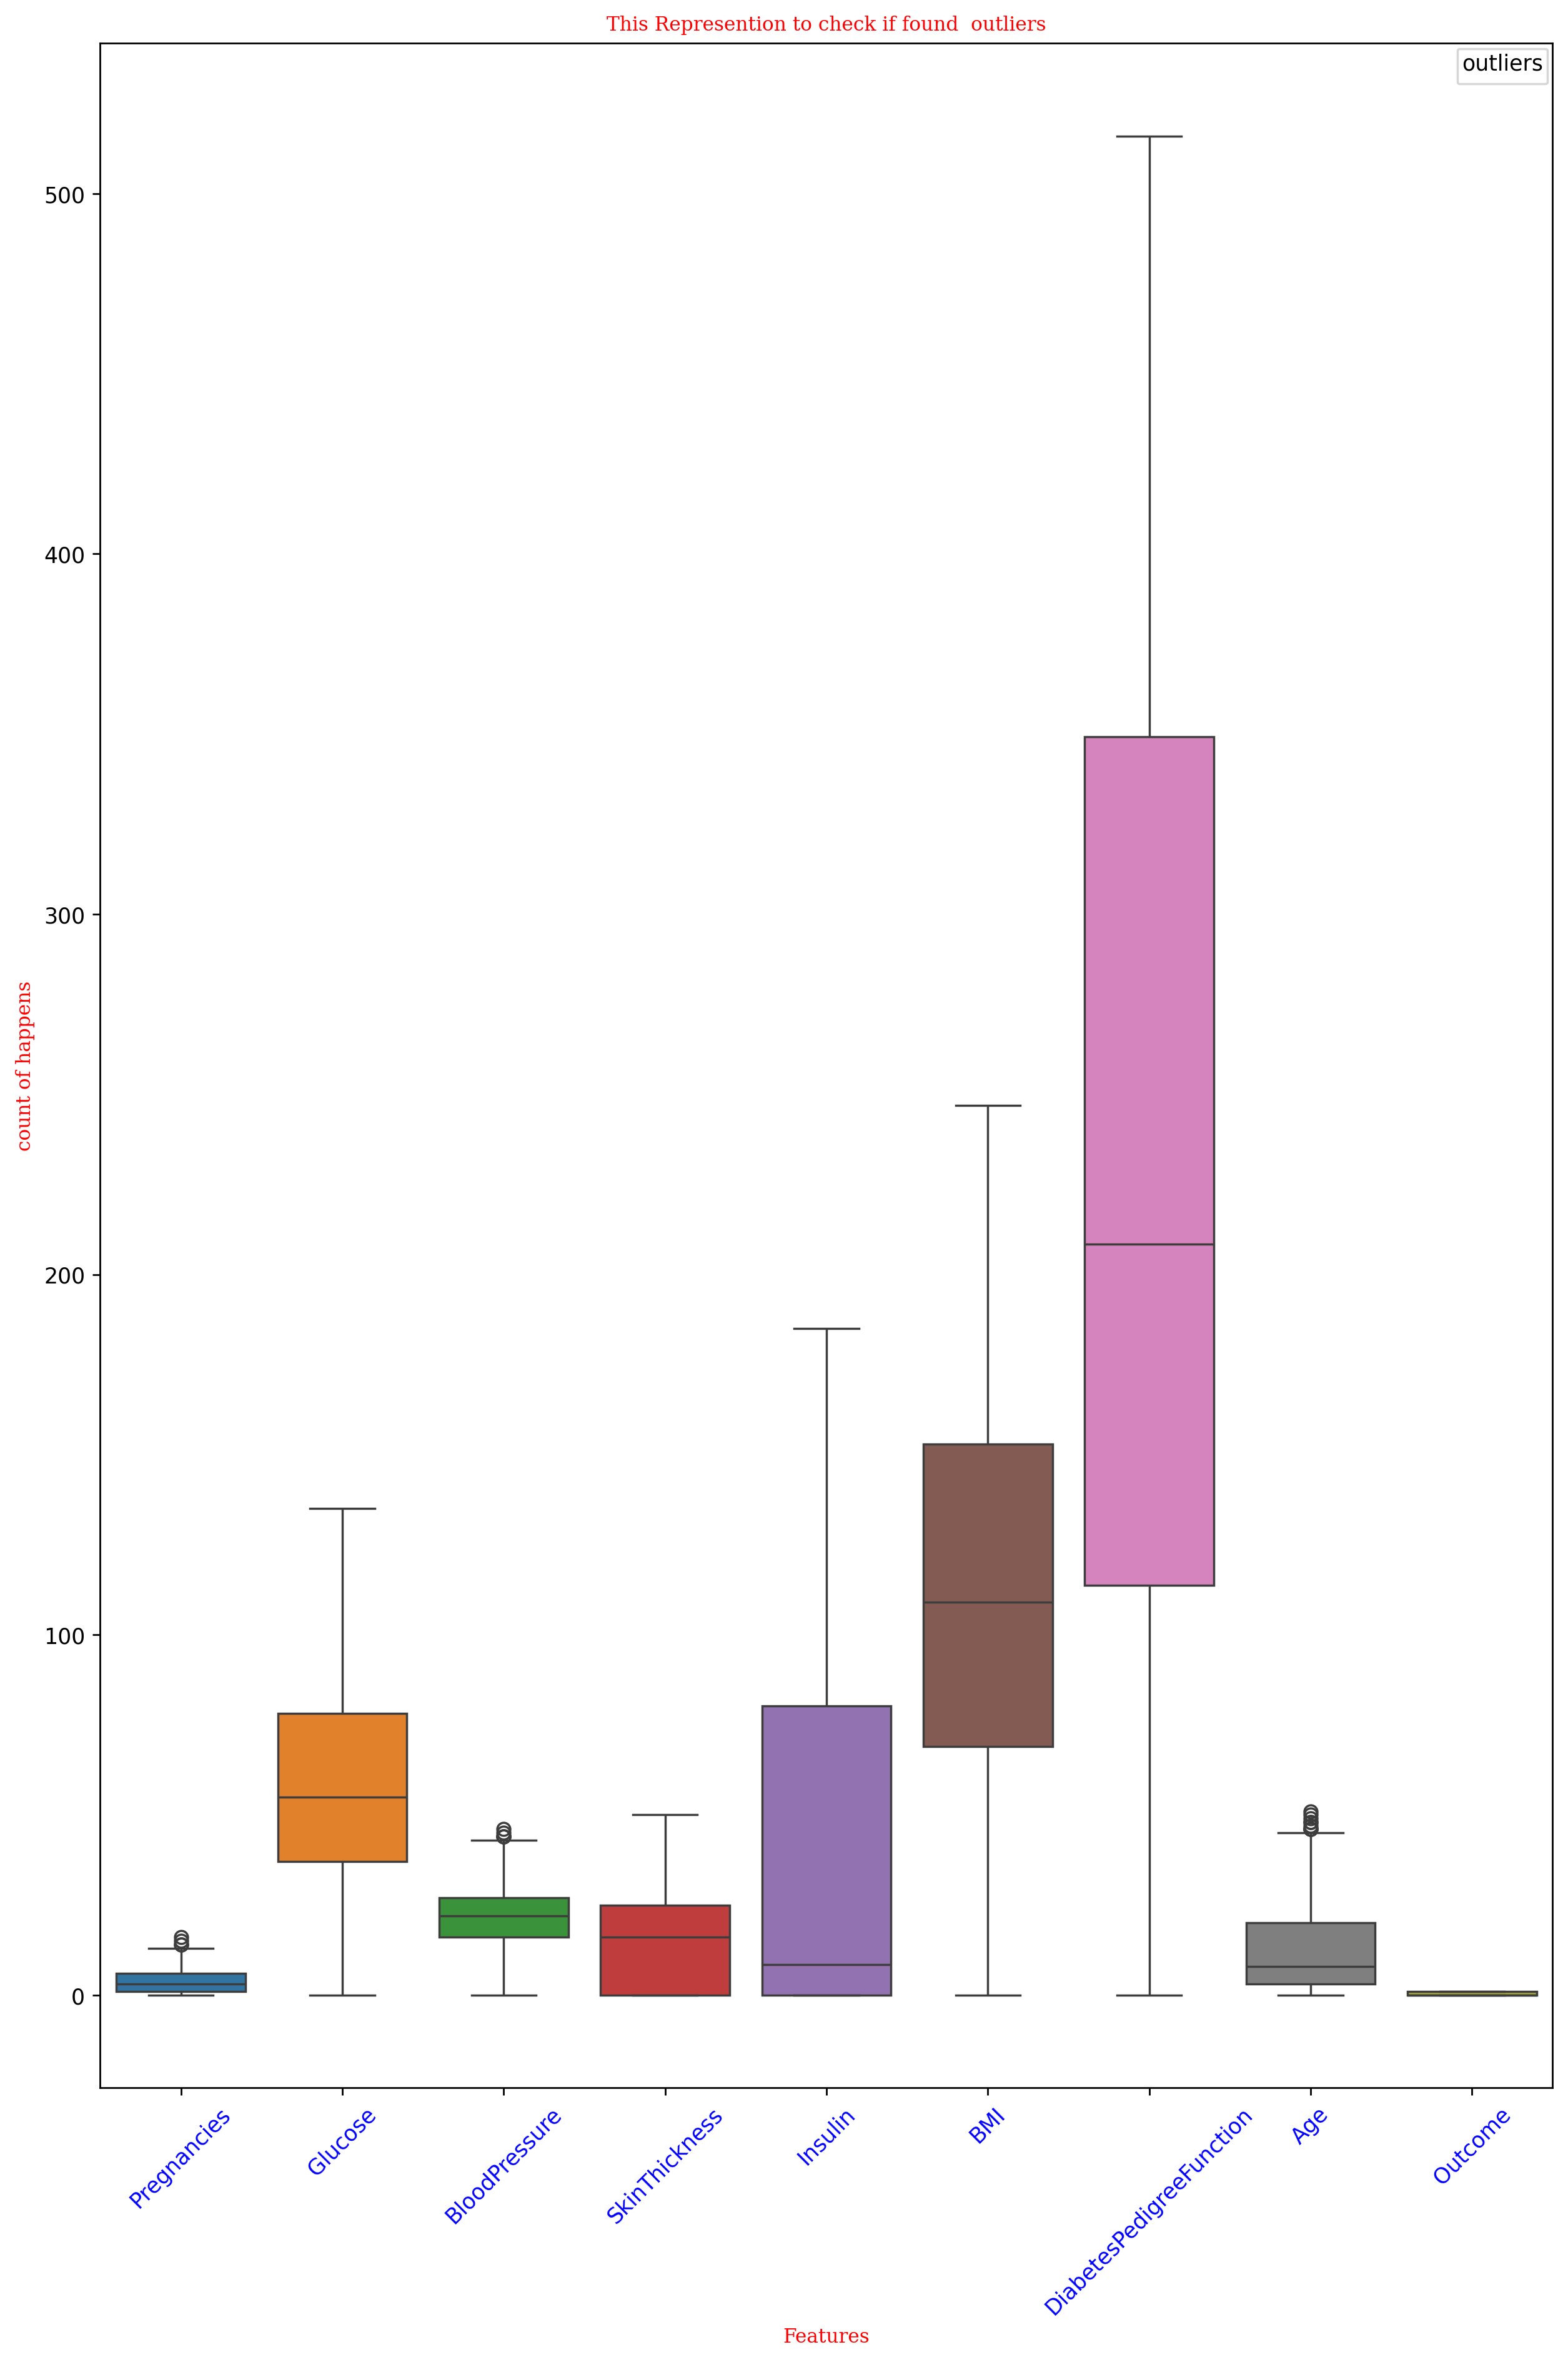

In [24]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(12,17),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  47.36603686939967
lower_limit :  -22.910307702733
Mean Value :  12.227864583333334
Median Value :  8.0
1st Standard Deviation :  11.712724095355444


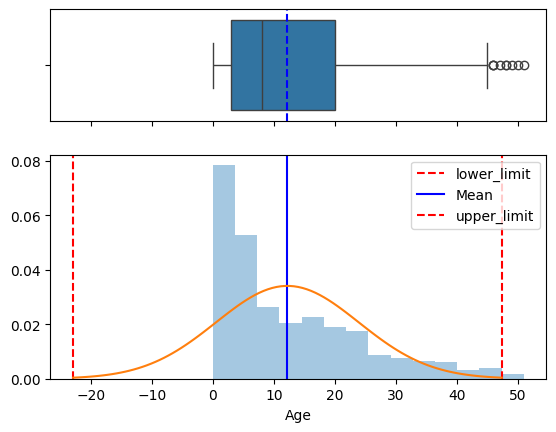

In [25]:
#Another way to calculate outlier on Age feature:-
# We found from the Distribution its standard Normal 

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Age.mean()
std = data.Age.std()
median = data.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [26]:
numerical_features = data.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.641267,0.874937,0.084726,0.951289,-0.805582,0.182778,0.835913,1.432892,1.365896
1,-0.845728,-1.191294,-0.260776,0.493382,-0.805582,-0.840500,-0.241471,-0.190333,-0.732120
2,1.236064,2.022842,-0.491110,-1.185608,-0.805582,-1.377301,0.961841,-0.104900,1.365896
3,-0.845728,-1.060105,-0.260776,0.035476,0.371893,-0.588874,-1.241900,-1.044662,-0.732120
4,-1.143127,0.514166,-1.988284,0.951289,1.131554,1.625432,1.983257,-0.019467,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.830862,-0.666537,0.430227,1.943420,1.245503,0.098903,-1.227908,2.543519,-0.732120
764,-0.548329,0.022207,-0.030441,0.340747,-0.805582,0.719580,-0.304435,-0.532064,-0.732120
765,0.343868,-0.010591,0.084726,0.035476,0.542817,-0.907600,-0.808148,-0.275766,-0.732120
766,-0.845728,0.153396,-0.836612,-1.185608,-0.805582,-0.286923,-0.248467,1.176593,1.365896


In [27]:
# split the data int train & test :

x=data.drop(columns="Outcome",axis=1)
y=data["Outcome"]

In [38]:
# train split of the Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (614, 8)
x_test shape :  (154, 8)
y_train shape :  (614,)
y_test shape :  (154,)


## Bulding Logistic Model & Evalute it  :

In [39]:
# Build the model :
lg=LogisticRegression()

# train the model :

lg.fit(x_train, y_train)

#predict  the model :

y_pred = lg.predict(x_test)

# Evaluate the model

mse = metrics.mean_squared_error(y_test, y_pred)
acc = lg.score(x_test,y_test)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract recall, precision, and f1-score
recall = report['1']['recall']
precision = report['1']['precision']
f1_score = report['1']['f1-score']



# Print the evaluation metrics :
    

print(f"Mean Squared Error (MSE): {mse}")
print("-"*20)
print(f"model_accuracy: {acc*100:0.2f}%")
print("-"*20)
print("\nClassification Report:")
print(report)
print("-"*20)
print(f"Recall: {recall}")
print("-"*20)
print(f"Precision: {precision}")
print("-"*20)
print(f"F1-Score: {f1_score}")
print("-"*25)


Mean Squared Error (MSE): 0.2532467532467532
--------------------
model_accuracy: 74.68%
--------------------

Classification Report:
{'0': {'precision': 0.8061224489795918, 'recall': 0.797979797979798, 'f1-score': 0.8020304568527918, 'support': 99}, '1': {'precision': 0.6428571428571429, 'recall': 0.6545454545454545, 'f1-score': 0.6486486486486486, 'support': 55}, 'accuracy': 0.7467532467532467, 'macro avg': {'precision': 0.7244897959183674, 'recall': 0.7262626262626263, 'f1-score': 0.7253395527507203, 'support': 154}, 'weighted avg': {'precision': 0.7478134110787172, 'recall': 0.7467532467532467, 'f1-score': 0.7472512396370264, 'support': 154}}
--------------------
Recall: 0.6545454545454545
--------------------
Precision: 0.6428571428571429
--------------------
F1-Score: 0.6486486486486486
-------------------------


## Save & Load the model :

In [36]:
import joblib
model_path = 'logistic.pkl' 
joblib.dump(lg, model_path)

# Load the model from the file
loaded_model = joblib.load(model_path)

## Thank You 

<img src="images.jpeg" alt="Description of the image" >